In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# reading files

In [2]:
data = pd.read_csv("C:/Users/kaige/Desktop/files/t1.csv")

In [3]:
data.head(5)

Date  Hour  Minute  Second  Voltage  Id
0  2019/1/8    23      36       2      240  96
1  2019/1/8    23      44      49      238  96
2  2019/1/8    23      45      49      238  96
3  2019/1/8    23      46      49      239  96
4  2019/1/8    23      47      49      238  96

In [4]:
data.shape

(1048575, 6)

# group  by date

In [5]:
group_date = data.groupby(['Id', 'Date'])['Voltage'].mean()
group_date = group_date.reset_index()  # framed
group_date['DateTime'] = pd.to_datetime(group_date['Date']) # format: timestamp
# group_date = group_date.groupby(['Id']).sort_values(by='Date', ascending=True)
date = group_date['Date']
group_date = group_date.drop(['Date'], axis = 1)

In [6]:
group_date.shape

(760, 3)

In [7]:
group_date.head(5)

Id     Voltage   DateTime
0   4  243.687597 2019-01-11
1   4  243.136206 2019-01-12
2   4  243.043115 2019-01-13
3   4  243.517026 2019-01-14
4   4  243.216423 2019-01-15

In [8]:
group_date[group_date['Id'] == 96]

Id     Voltage   DateTime
697  96  237.524109 2019-01-10
698  96  242.815716 2019-01-11
699  96  241.112578 2019-01-12
700  96  240.478079 2019-01-13
701  96  241.436111 2019-01-14
702  96  240.565369 2019-01-15
703  96  240.593185 2019-01-16
704  96  242.268428 2019-01-17
705  96  241.112578 2019-01-18
706  96  241.167594 2019-01-19
707  96  240.383171 2019-01-20
708  96  242.616134 2019-01-21
709  96  242.196106 2019-01-22
710  96  241.089013 2019-01-23
711  96  240.472879 2019-01-24
712  96  241.754520 2019-01-25
713  96  240.773296 2019-01-26
714  96  240.245480 2019-01-27
715  96  239.847705 2019-01-28
716  96  240.987483 2019-01-29
717  96  240.938804 2019-01-30
718  96  240.184979 2019-01-31
719  96  237.764706 2019-01-08
720  96  237.912439 2019-01-09
721  96  240.541725 2019-02-01
722  96  239.958275 2019-02-10
723  96  244.292683 2019-02-11
724  96  241.121697 2019-02-02
725  96  240.253129 2019-02-03
726  96  242.093185 2019-02-04
727  96  241.744089 2019-02-05
728  96  241.659249 2019-02-06
729  96  240.859625 2019-02-07
730  96  241.743215 2019-02-08
731  96  240.895761 2019-02-09

### write to excel

In [9]:
group_date.to_excel('C:/Users/kaige/Desktop/files/groupedby_date.xls', encoding='utf-8')

In [10]:
data_date = group_date.drop(['DateTime'], axis = 1).values.copy()

In [11]:
data_date

array([[  4.        , 243.6875969 ],
       [  4.        , 243.1362057 ],
       [  4.        , 243.04311544],
       ...,
       [ 99.        , 237.39819319],
       [ 99.        , 237.12656467],
       [ 99.        , 234.57817929]])

In [12]:
type(group_date['DateTime'])

pandas.core.series.Series

# plot figure grouped by date

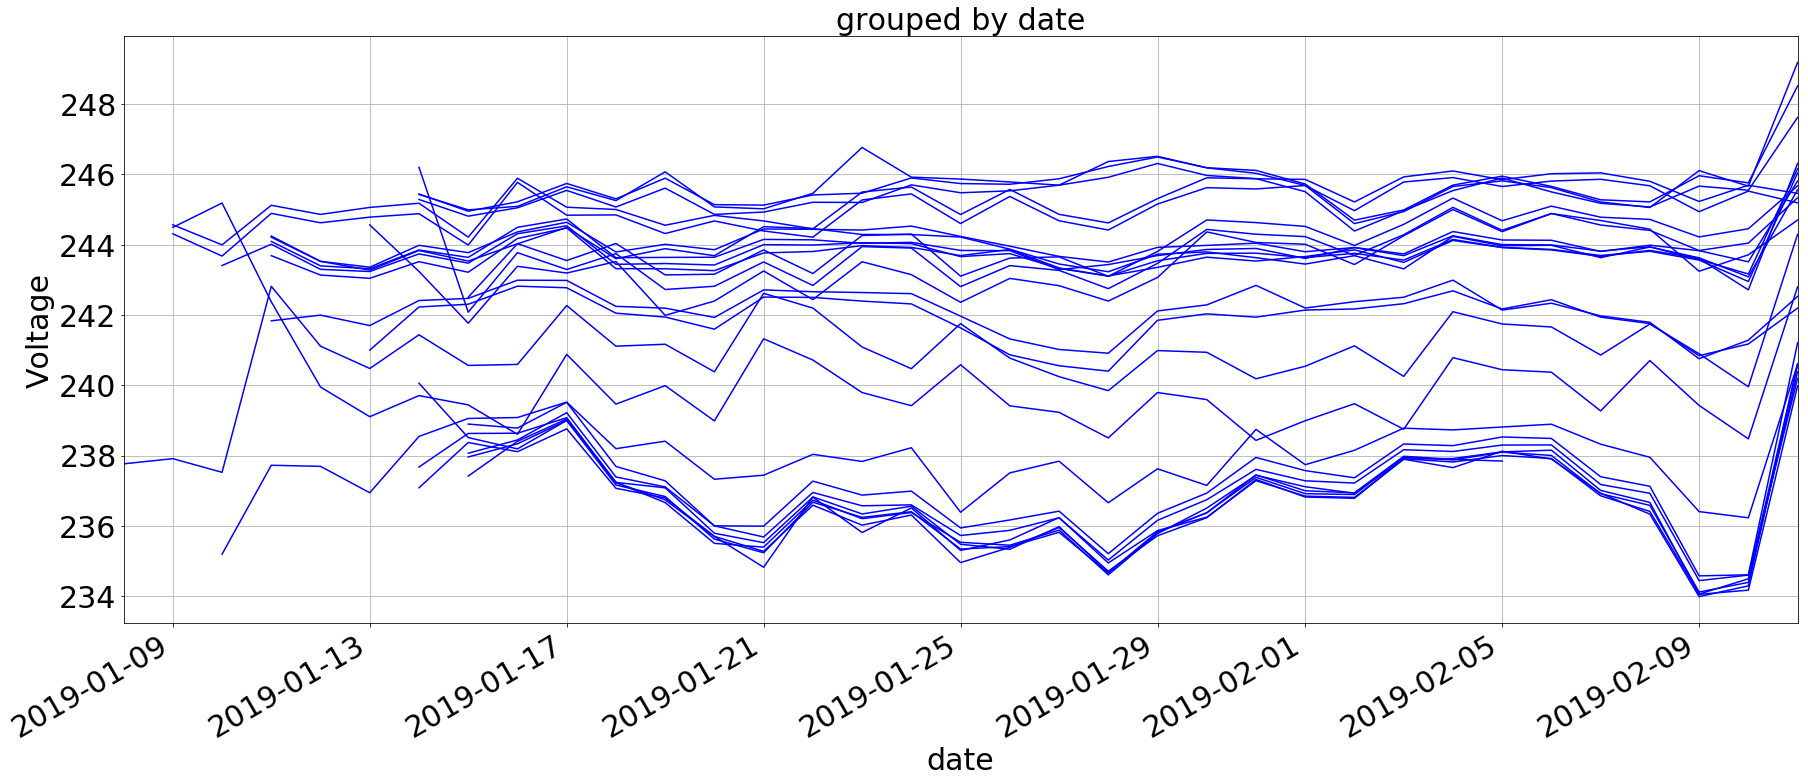

In [13]:
id_list = group_date['Id'].drop_duplicates().tolist()
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(id_list)):
    rows = group_date[group_date['Id'] == id_list[i]]
    rows.plot('DateTime', 'Voltage', kind = 'line',color = 'blue', ax = ax, legend = False, figsize = (30, 12), grid = True, fontsize = 30)

plt.title('grouped by date', fontsize = 30)
plt.xlabel('date', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()

# grouped by hour

In [14]:
group_hour = data.groupby(['Id', 'Hour'])['Voltage'].mean()
group_hour = group_hour.reset_index()
# group_hour = group_hour.sort_values(by='Hour', ascending=True)

In [15]:
group_hour.shape

(600, 3)

In [16]:
group_hour.head(5)

Id  Hour     Voltage
0   4     0  244.472581
1   4     1  245.396561
2   4     2  245.148088
3   4     3  245.051419
4   4     4  244.917742

In [17]:
group_hour.to_excel('C:/Users/kaige/Desktop/files/groupedby_hour.xls', encoding='utf-8')

In [18]:
data_hour = group_hour.values.copy()

# plot figure grouped by hour

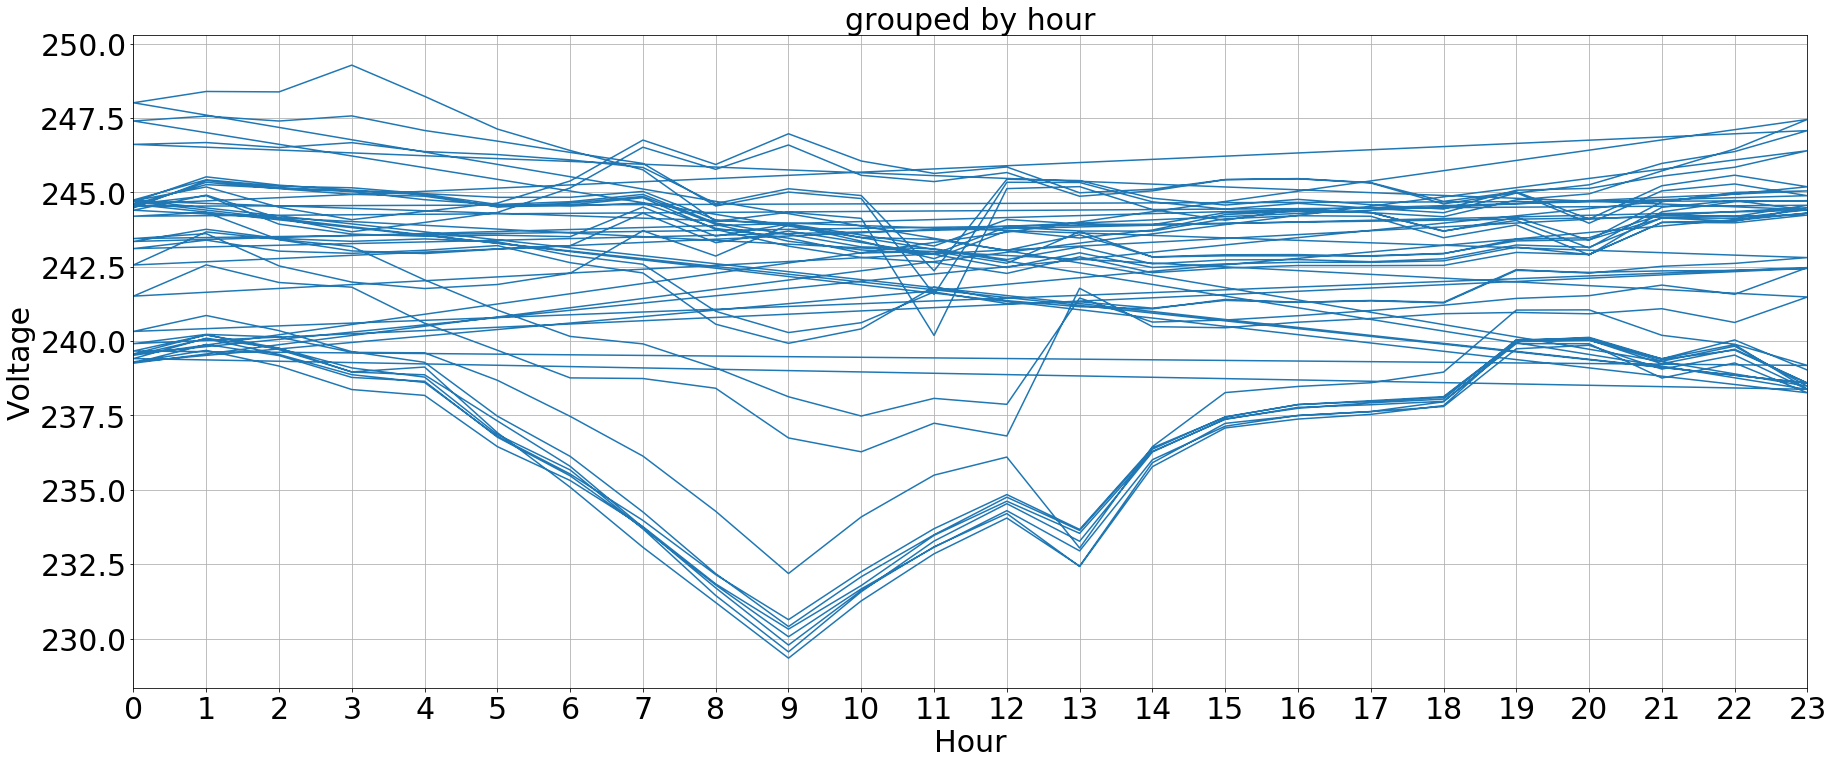

In [19]:
group_hour.plot('Hour', 'Voltage', kind = 'line', legend = False, grid = True, figsize = (30, 12), xticks = range(0,24), fontsize = 30)
plt.title('grouped by hour', fontsize = 30)
plt.xlabel('Hour', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()

# train Date, k-means

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [21]:
arrs = date.values
arrs = [arrs]

In [22]:
# using one-hot-encoding
from sklearn.preprocessing import OneHotEncoder

# character: date 
encoder = OneHotEncoder()
encoder.fit(arrs)
encoder_vector = encoder.transform(arrs).toarray()

In [23]:
clinski_harabaz_scores = []
cluster_num = range(2, 35)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    data_train = np.concatenate((data_date, encoder_vector.T), axis = 1)
    predict = kmeans.fit_predict(data_train)
    clinski_harabaz_scores.append(metrics.calinski_harabaz_score(data_train, predict))
    

In [24]:
clinski_harabaz_scores

[1907.1469642601876,
 3551.4965401836457,
 4629.107668123741,
 4939.699033731591,
 4937.133393380491,
 5446.732638307243,
 5705.5044361305945,
 6240.717231873956,
 6534.252764113137,
 8311.456233226523,
 9671.524144625071,
 11262.91565198623,
 13467.193481509252,
 16012.01248469228,
 17644.294565337234,
 19774.83467807503,
 21649.997488992685,
 26482.99533947745,
 28794.116623862712,
 29819.023783007156,
 31589.938863334806,
 31883.199138607717,
 33123.85745303332,
 33344.85788746624,
 33353.721292307855,
 33642.38771273312,
 34042.60071307305,
 34957.04811445995,
 34939.57807313782,
 35193.41356146541,
 35518.844607928295,
 35077.0140386674,
 36115.3136671025]

<function matplotlib.pyplot.show(*args, **kw)>

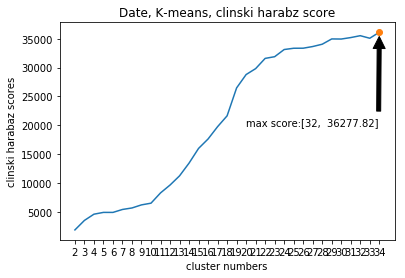

In [25]:
fig = plt.figure()
x = range(2,35)
plt.plot(x, clinski_harabaz_scores)
plt.xlabel('cluster numbers')
plt.xticks(range(2, 35))
plt.ylabel('clinski harabaz scores')
plt.title('Date, K-means, clinski harabz score')  # score with diff cluster numbers
max_clin = max(clinski_harabaz_scores)
max_clin_index = clinski_harabaz_scores.index(max(clinski_harabaz_scores)) + 2
plt.plot([max_clin_index], [max_clin], 'o')
plt.annotate('max score:[32,  36277.82]', xy = (max_clin_index, max_clin), xytext = (20,20000),
            arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.show

### cluster numbers = 4

In [26]:
kmeans = KMeans(n_clusters = 4, n_jobs = 4)
predict = kmeans.fit_predict(data_train)

In [27]:
group_date['cluster_kmeans'] = predict

In [28]:
group_date[group_date['Id'] == 96]

Id     Voltage   DateTime  cluster_kmeans
697  96  237.524109 2019-01-10               3
698  96  242.815716 2019-01-11               3
699  96  241.112578 2019-01-12               3
700  96  240.478079 2019-01-13               3
701  96  241.436111 2019-01-14               3
702  96  240.565369 2019-01-15               3
703  96  240.593185 2019-01-16               3
704  96  242.268428 2019-01-17               3
705  96  241.112578 2019-01-18               3
706  96  241.167594 2019-01-19               3
707  96  240.383171 2019-01-20               3
708  96  242.616134 2019-01-21               3
709  96  242.196106 2019-01-22               3
710  96  241.089013 2019-01-23               3
711  96  240.472879 2019-01-24               3
712  96  241.754520 2019-01-25               3
713  96  240.773296 2019-01-26               3
714  96  240.245480 2019-01-27               3
715  96  239.847705 2019-01-28               3
716  96  240.987483 2019-01-29               3
717  96  240.938804 2019-01-30               3
718  96  240.184979 2019-01-31               3
719  96  237.764706 2019-01-08               3
720  96  237.912439 2019-01-09               3
721  96  240.541725 2019-02-01               3
722  96  239.958275 2019-02-10               3
723  96  244.292683 2019-02-11               3
724  96  241.121697 2019-02-02               3
725  96  240.253129 2019-02-03               3
726  96  242.093185 2019-02-04               3
727  96  241.744089 2019-02-05               3
728  96  241.659249 2019-02-06               3
729  96  240.859625 2019-02-07               3
730  96  241.743215 2019-02-08               3
731  96  240.895761 2019-02-09               3

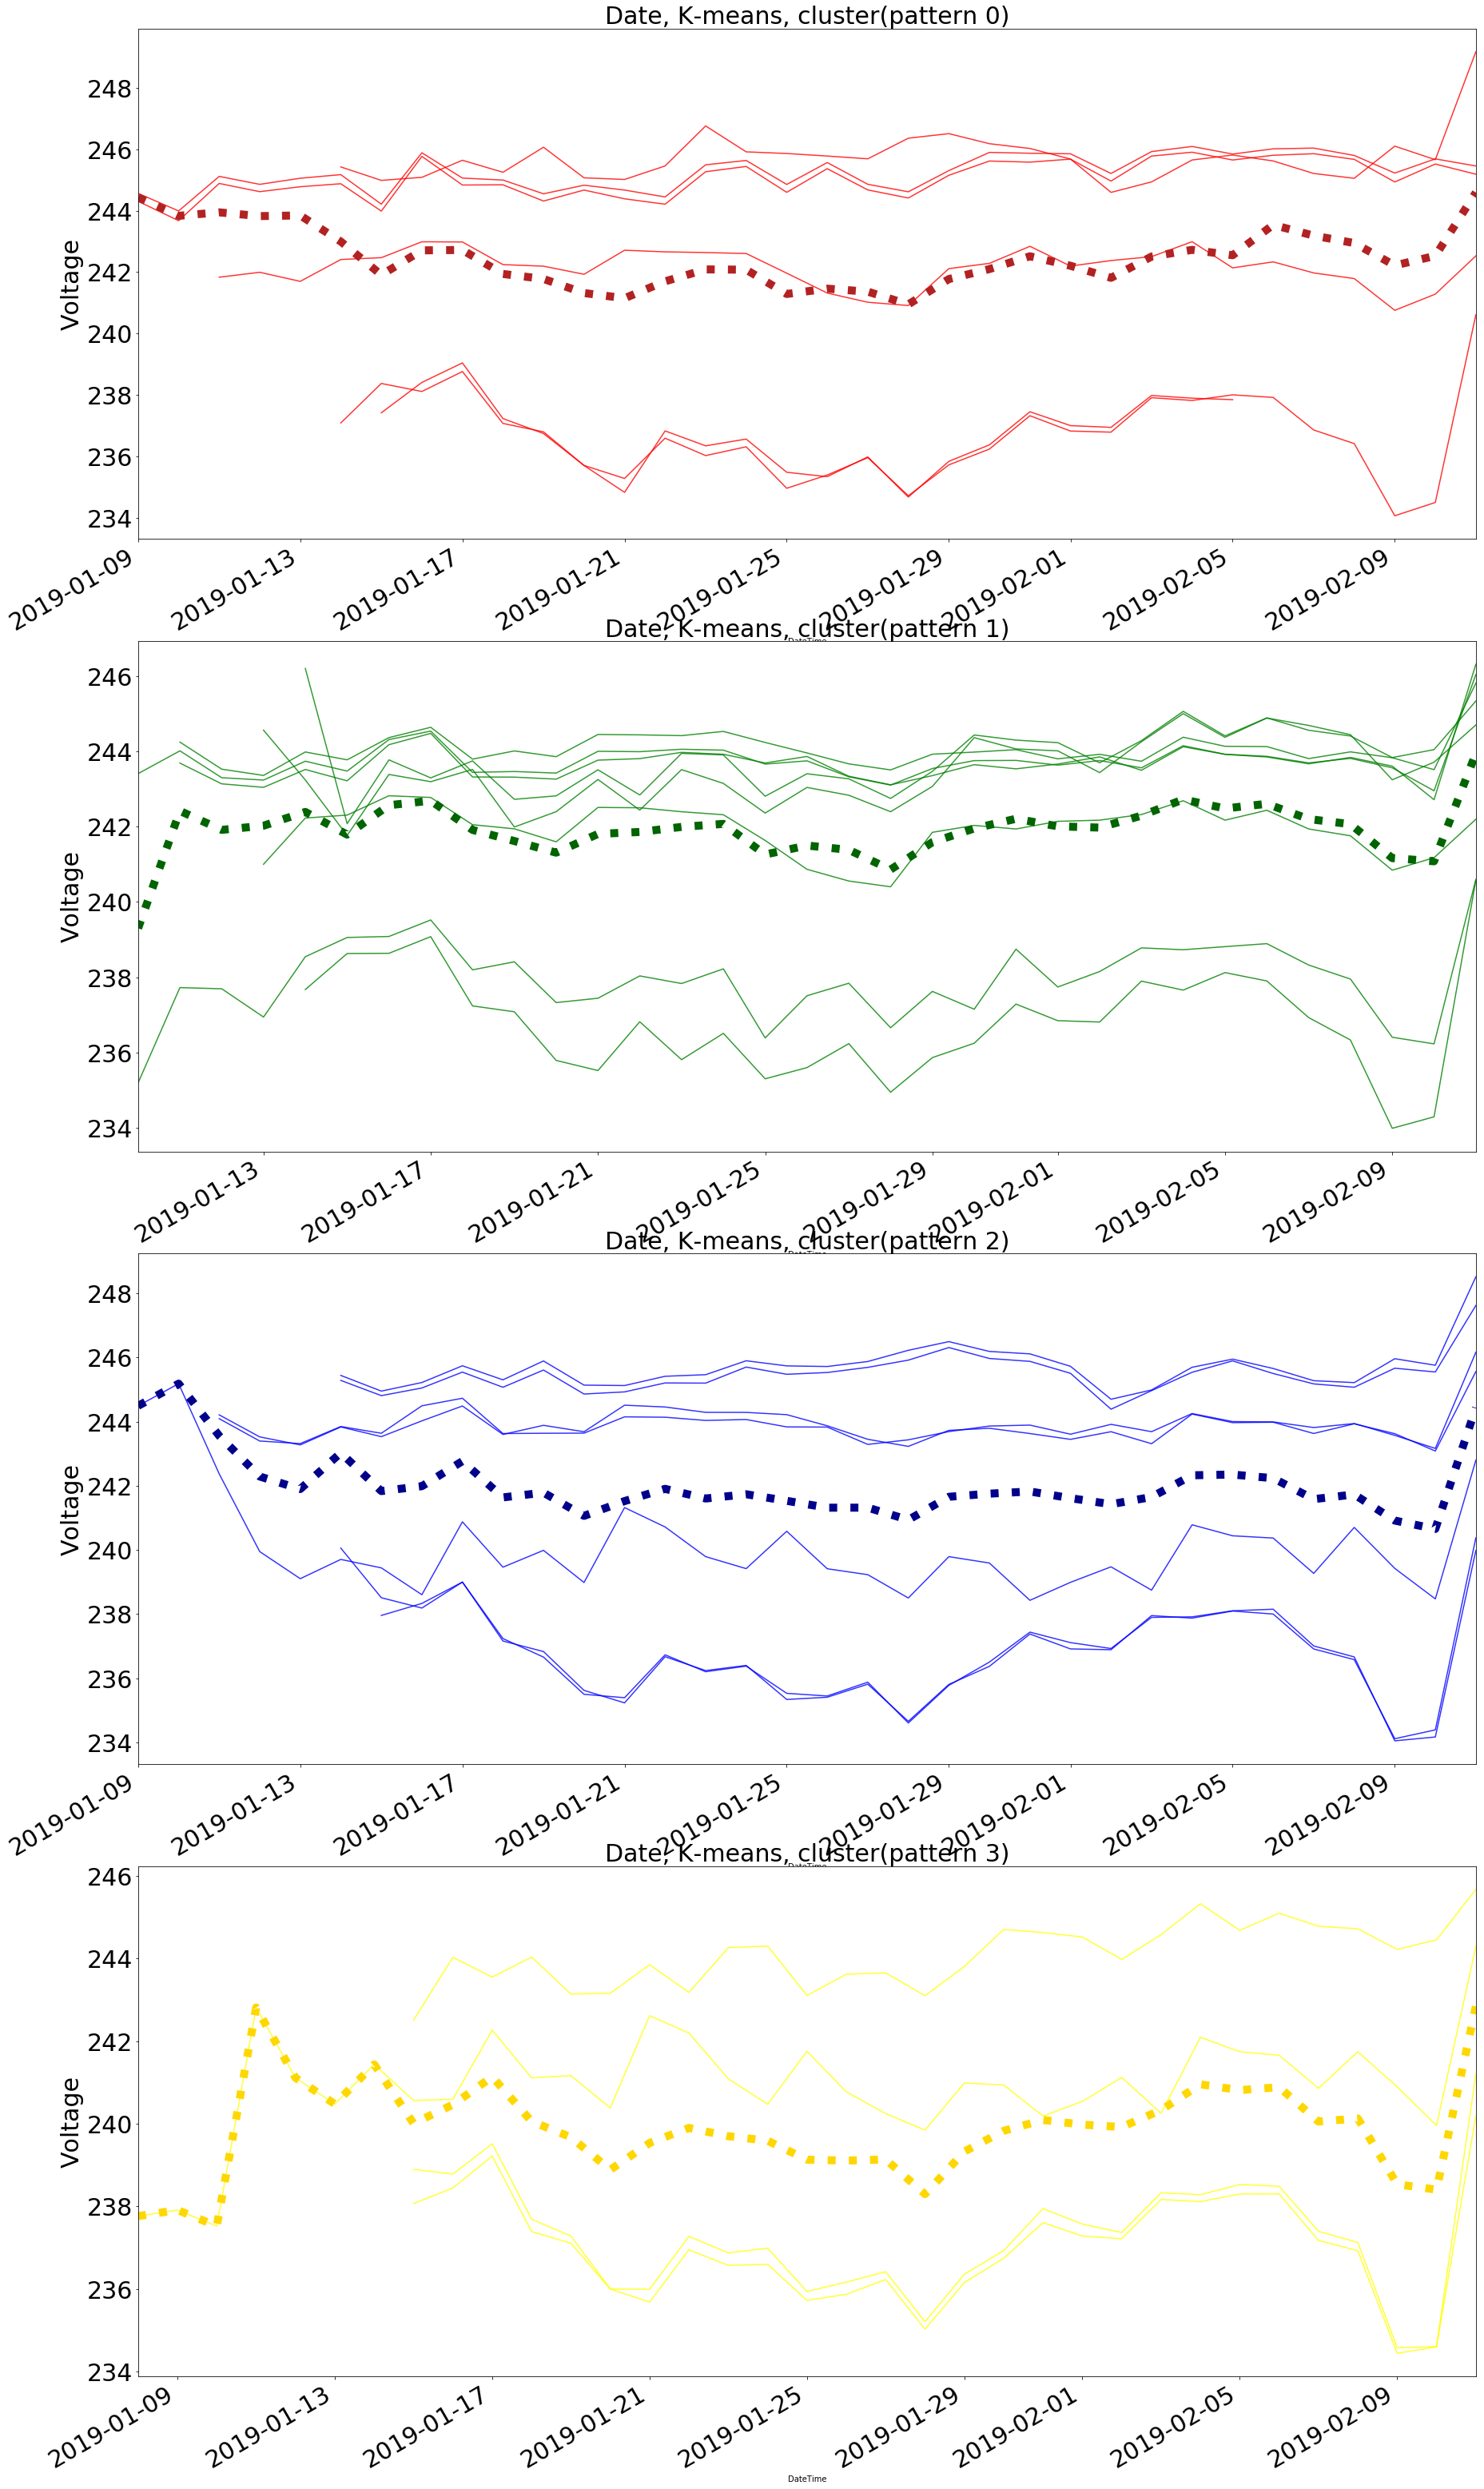

In [31]:
# id_list = group_date['Id'].drop_duplicates().tolist()
color_list = ['red','green','blue', 'yellow']
median_list = ['firebrick', 'darkgreen', 'darkblue', 'gold']
fig, axes = plt.subplots(4, 1, figsize = (30, 60))
# fig.tight_layout()
# plt.subplots_adjust(wspace =0, hspace =0)

for i in range(len(id_list)):
    rows = group_date[group_date['Id'] == id_list[i]]
    cluster_index = int(rows['cluster_kmeans'].mode())  
    rows.plot('DateTime', 'Voltage', kind = 'line',ax = axes[cluster_index], color= color_list[cluster_index], alpha = 0.8,legend = False, grid = True, fontsize = 30)
    axes[cluster_index].set_title('Date, K-means, cluster(pattern ' + str(cluster_index) + ")", fontsize = 30)
    axes[cluster_index].set_ylabel('Voltage', fontsize = 30)
#     plt.show()
    
# plot median for 4 clusters
cluster_num = 4
for i in range(cluster_num):
    rows = group_date[group_date['cluster_kmeans'] == i]
    median = rows.groupby([ 'DateTime'])['Voltage'].mean()
    median.plot(color = median_list[i],ax = axes[i], linewidth = 10, ls = ':')


### cluster numbers = 10

In [32]:
kmeans = KMeans(n_clusters = 10, n_jobs = 4)
predict = kmeans.fit_predict(data_train)

In [33]:
group_date['cluster_kmeans'] = predict

In [34]:
group_date[group_date['Id'] == 96]

Id     Voltage   DateTime  cluster_kmeans
697  96  237.524109 2019-01-10               4
698  96  242.815716 2019-01-11               4
699  96  241.112578 2019-01-12               4
700  96  240.478079 2019-01-13               4
701  96  241.436111 2019-01-14               4
702  96  240.565369 2019-01-15               4
703  96  240.593185 2019-01-16               4
704  96  242.268428 2019-01-17               4
705  96  241.112578 2019-01-18               4
706  96  241.167594 2019-01-19               4
707  96  240.383171 2019-01-20               4
708  96  242.616134 2019-01-21               4
709  96  242.196106 2019-01-22               4
710  96  241.089013 2019-01-23               4
711  96  240.472879 2019-01-24               4
712  96  241.754520 2019-01-25               4
713  96  240.773296 2019-01-26               4
714  96  240.245480 2019-01-27               4
715  96  239.847705 2019-01-28               4
716  96  240.987483 2019-01-29               4
717  96  240.938804 2019-01-30               4
718  96  240.184979 2019-01-31               4
719  96  237.764706 2019-01-08               4
720  96  237.912439 2019-01-09               4
721  96  240.541725 2019-02-01               4
722  96  239.958275 2019-02-10               4
723  96  244.292683 2019-02-11               4
724  96  241.121697 2019-02-02               4
725  96  240.253129 2019-02-03               4
726  96  242.093185 2019-02-04               4
727  96  241.744089 2019-02-05               4
728  96  241.659249 2019-02-06               4
729  96  240.859625 2019-02-07               4
730  96  241.743215 2019-02-08               4
731  96  240.895761 2019-02-09               4

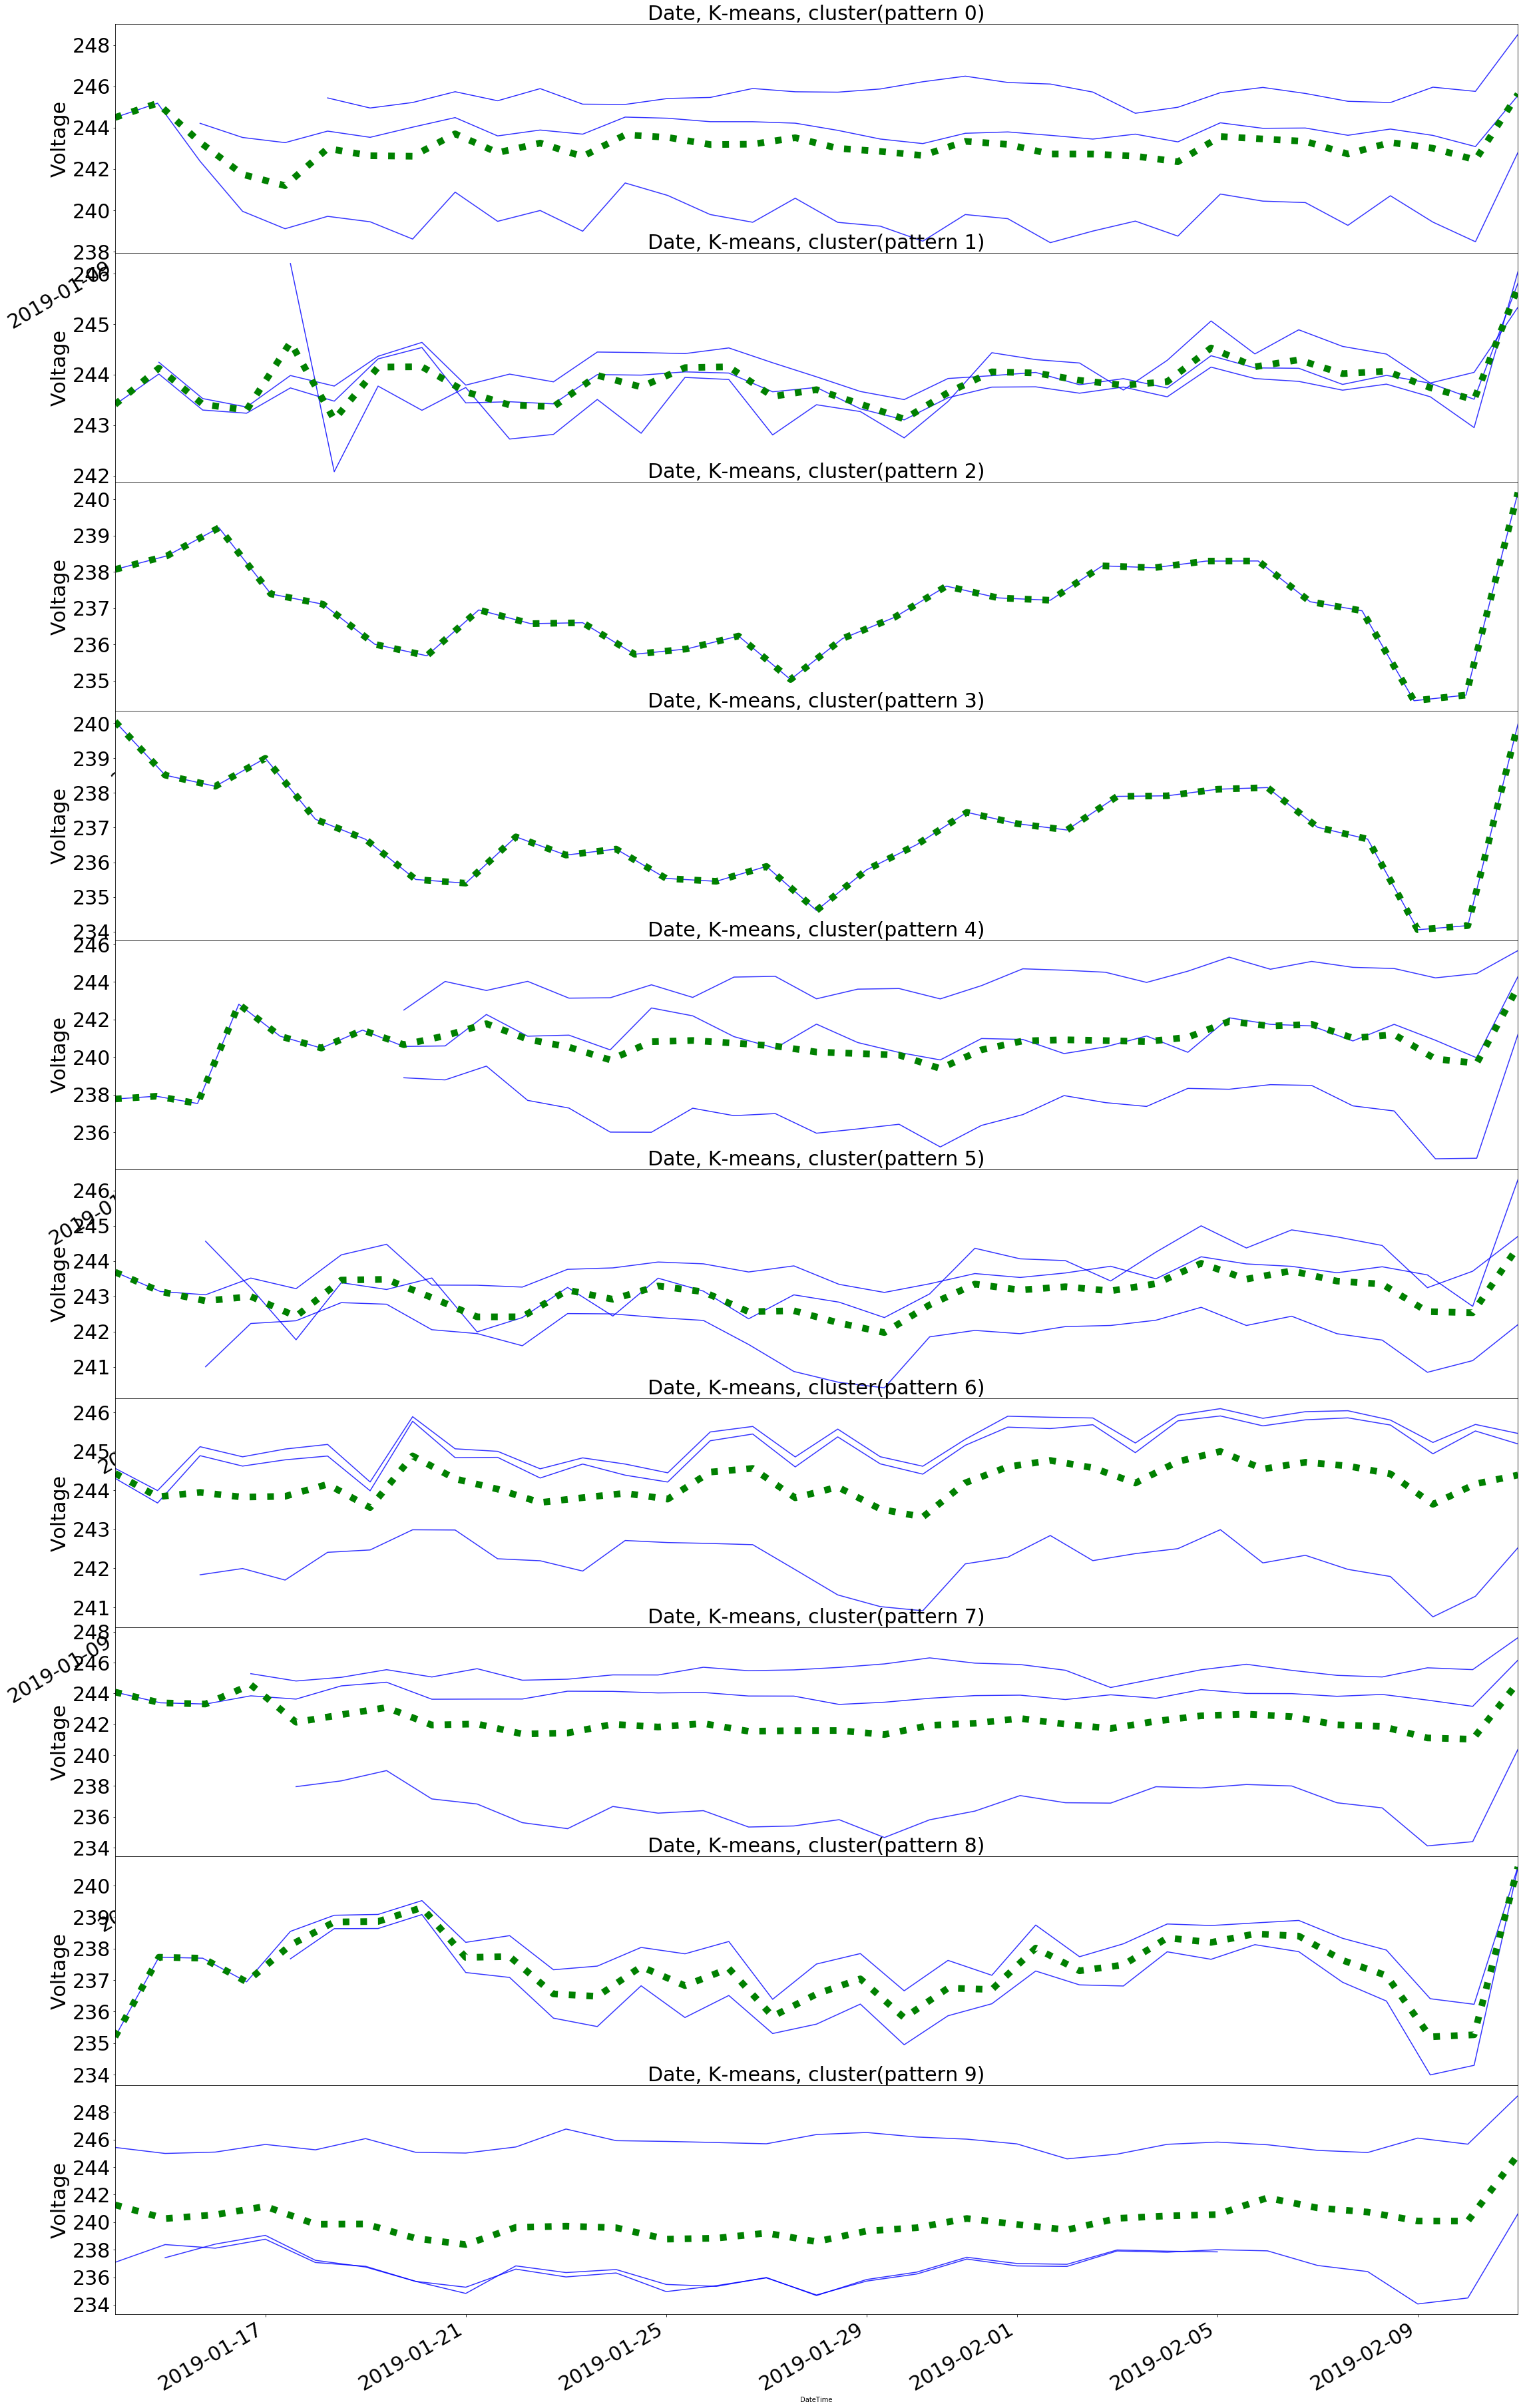

In [35]:
# id_list = group_date['Id'].drop_duplicates().tolist()
# color_list = ['red','green','blue', 'yellow']
# median_list = ['firebrick', 'darkgreen', 'darkblue', 'gold']
fig, axes = plt.subplots(10, 1, figsize = (30, 60))
fig.tight_layout()
plt.subplots_adjust(wspace =0, hspace =0)

for i in range(len(id_list)):
    rows = group_date[group_date['Id'] == id_list[i]]
    cluster_index = int(rows['cluster_kmeans'].mode())  
    rows.plot('DateTime', 'Voltage', kind = 'line',ax = axes[cluster_index], color = 'blue', alpha = 0.8,legend = False, grid = True, fontsize = 30)
    axes[cluster_index].set_title('Date, K-means, cluster(pattern ' + str(cluster_index) + ")", fontsize = 30)
#     axes[cluster_index].set_xlabel('date', fontsize = 30)
    axes[cluster_index].set_ylabel('Voltage', fontsize = 30)
#     plt.show()
    
# plot median for 10 clusters
cluster_num = 10
for i in range(cluster_num):
    rows = group_date[group_date['cluster_kmeans'] == i]
    median = rows.groupby([ 'DateTime'])['Voltage'].mean()
    median.plot(color = 'green',ax = axes[i], linewidth = 10, ls = ':')


# train Hour, k-means

In [36]:
clinski_harabaz_scores = []
cluster_num = range(2, 35)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(data_hour)
    clinski_harabaz_scores.append(metrics.calinski_harabaz_score(data_hour, predict))

In [37]:
clinski_harabaz_scores

[1271.3842121102648,
 1767.9290828650803,
 1738.9858981262835,
 1532.6802869494315,
 1436.4614110206396,
 1364.5174156230355,
 1304.3572997815186,
 1263.9103117795346,
 1210.2237748989949,
 1201.3250624439129,
 1191.645373484036,
 1176.130970496129,
 1173.648496736653,
 1157.566391640084,
 1170.3593718071083,
 1196.0356772519567,
 1171.7692250961084,
 1211.0737549134058,
 1229.5805721857273,
 1205.0510084723426,
 1222.2822874939443,
 1203.4561890628888,
 1209.3552534379412,
 1218.0863552394446,
 1230.8660819428492,
 1270.2591980508591,
 1269.7362908049345,
 1283.3114691443272,
 1270.09399026111,
 1269.5484945149387,
 1287.4186921046446,
 1316.3688059003227,
 1287.7772926944772]

<function matplotlib.pyplot.show(*args, **kw)>

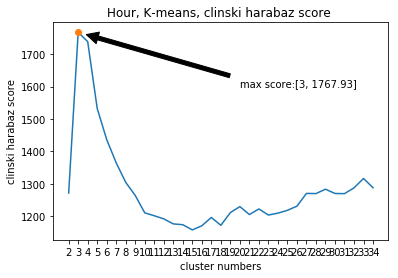

In [38]:
fig = plt.figure()
x = range(2,35)
plt.plot(x, clinski_harabaz_scores)
plt.xlabel('cluster numbers')
plt.xticks(range(2, 35))
plt.ylabel('clinski harabaz score')
plt.title('Hour, K-means, clinski harabaz score ') # scores with different cluster numbers
max_clin = max(clinski_harabaz_scores)
max_clin_index = clinski_harabaz_scores.index(max(clinski_harabaz_scores)) + 2
plt.plot([max_clin_index], [max_clin], 'o')
plt.annotate('max score:[3, 1767.93]', xy = (max_clin_index, max_clin), xytext = (20,1600),
            arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.show

### cluster numbers = 3 is best

In [39]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
predict = kmeans.fit_predict(data_hour)

In [40]:
group_hour['cluster_kmeans'] = predict

In [41]:
group_hour.head()

Id  Hour     Voltage  cluster_kmeans
0   4     0  244.472581               1
1   4     1  245.396561               1
2   4     2  245.148088               1
3   4     3  245.051419               1
4   4     4  244.917742               1

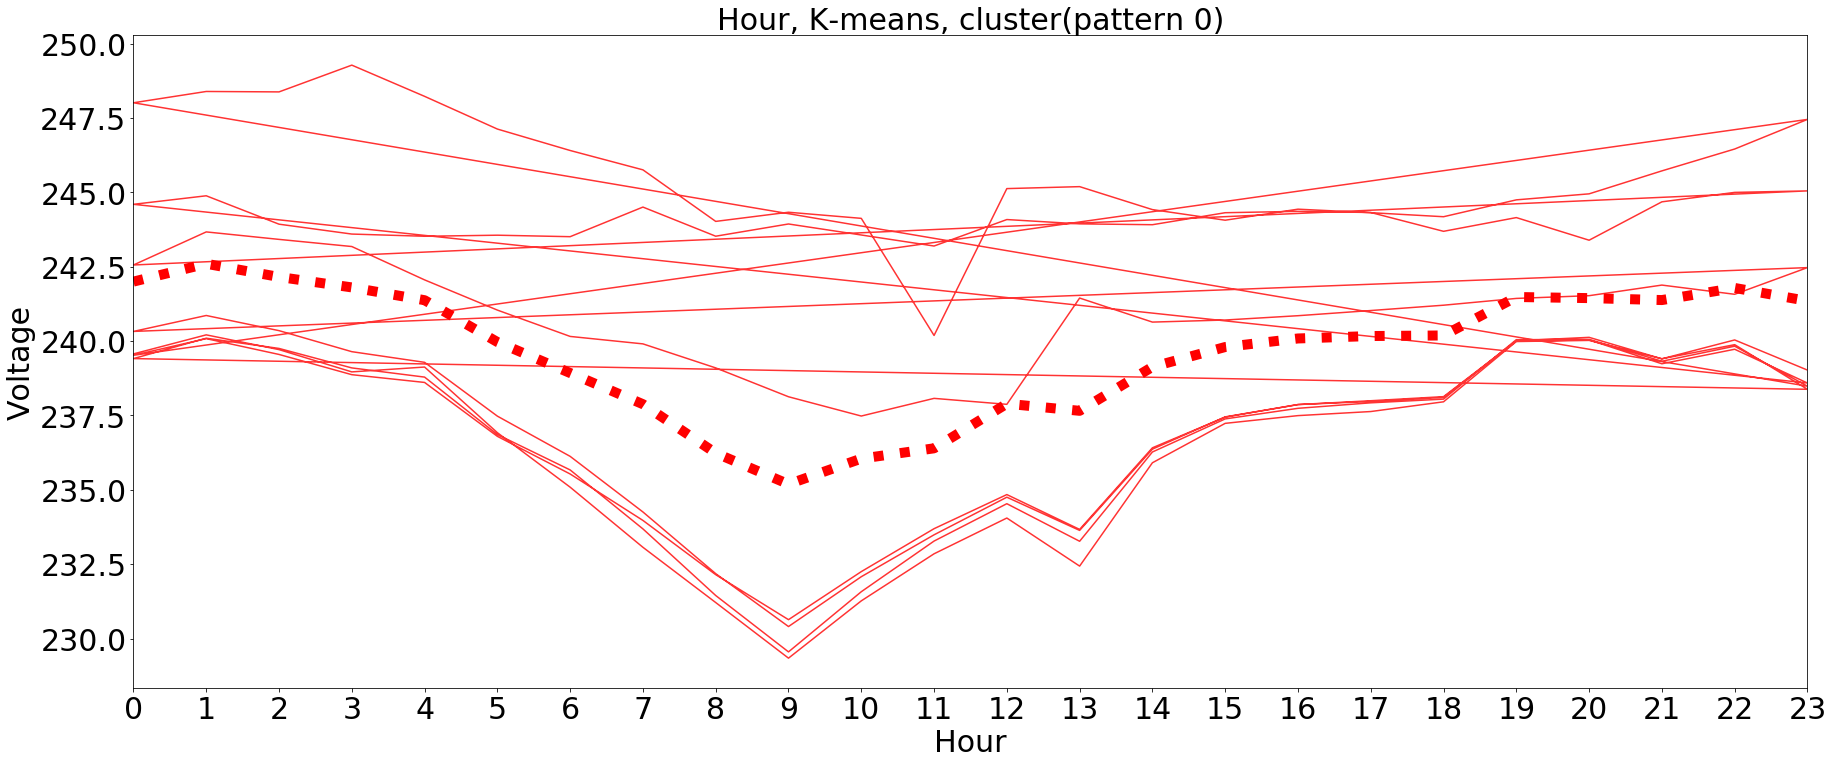

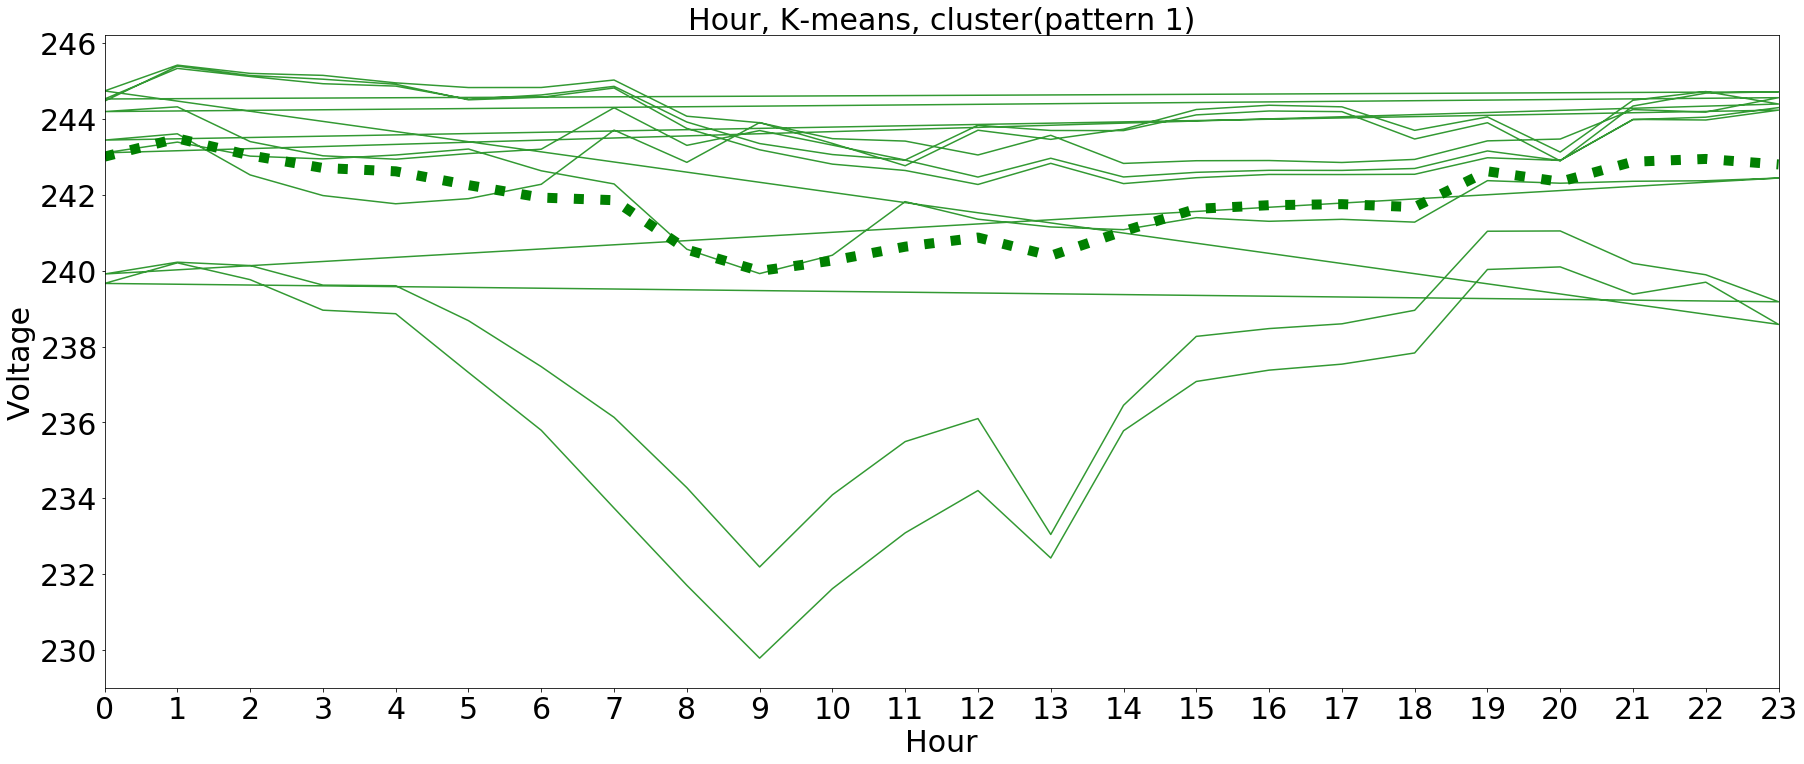

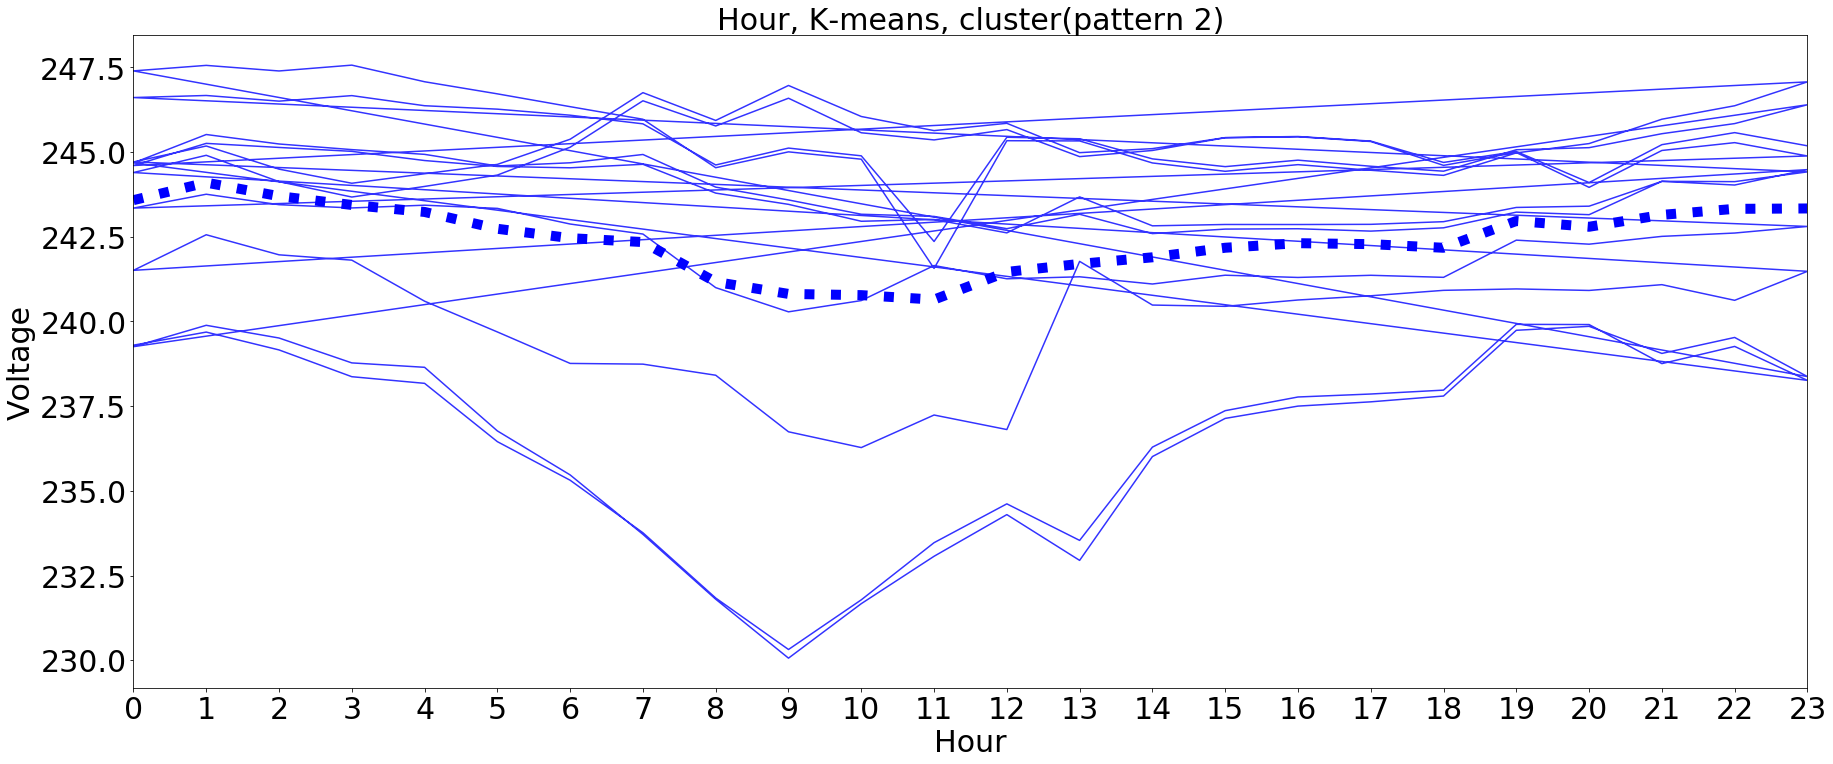

In [42]:
color_list = ['red','green','blue']
median_list = ['firebrick', 'darkgreen', 'darkblue']
cluster_num = 3

# fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(cluster_num):
    rows = group_hour[group_hour['cluster_kmeans'] == i]
    rows.plot('Hour', 'Voltage', kind = 'line', color= color_list[i],alpha = 0.8, legend = False, figsize = (30, 12), grid = True, xticks = range(0,24), fontsize = 30)
    median = rows.groupby([ 'Hour'])['Voltage'].mean()
    median.plot(color = color_list[i], linewidth = 10, ls = ':')
    plt.title('Hour, K-means, cluster(pattern ' + str(i) + ")", fontsize = 30)
    plt.xlabel('Hour', fontsize = 30)
    plt.ylabel('Voltage', fontsize = 30)
    plt.show()
    

### cluster numbers = 10

In [43]:
kmeans = KMeans(n_clusters = 10, n_jobs = 4)
predict = kmeans.fit_predict(data_hour)

In [44]:
group_hour['cluster_kmeans'] = predict

In [45]:
group_hour.head()

Id  Hour     Voltage  cluster_kmeans
0   4     0  244.472581               2
1   4     1  245.396561               2
2   4     2  245.148088               2
3   4     3  245.051419               2
4   4     4  244.917742               2

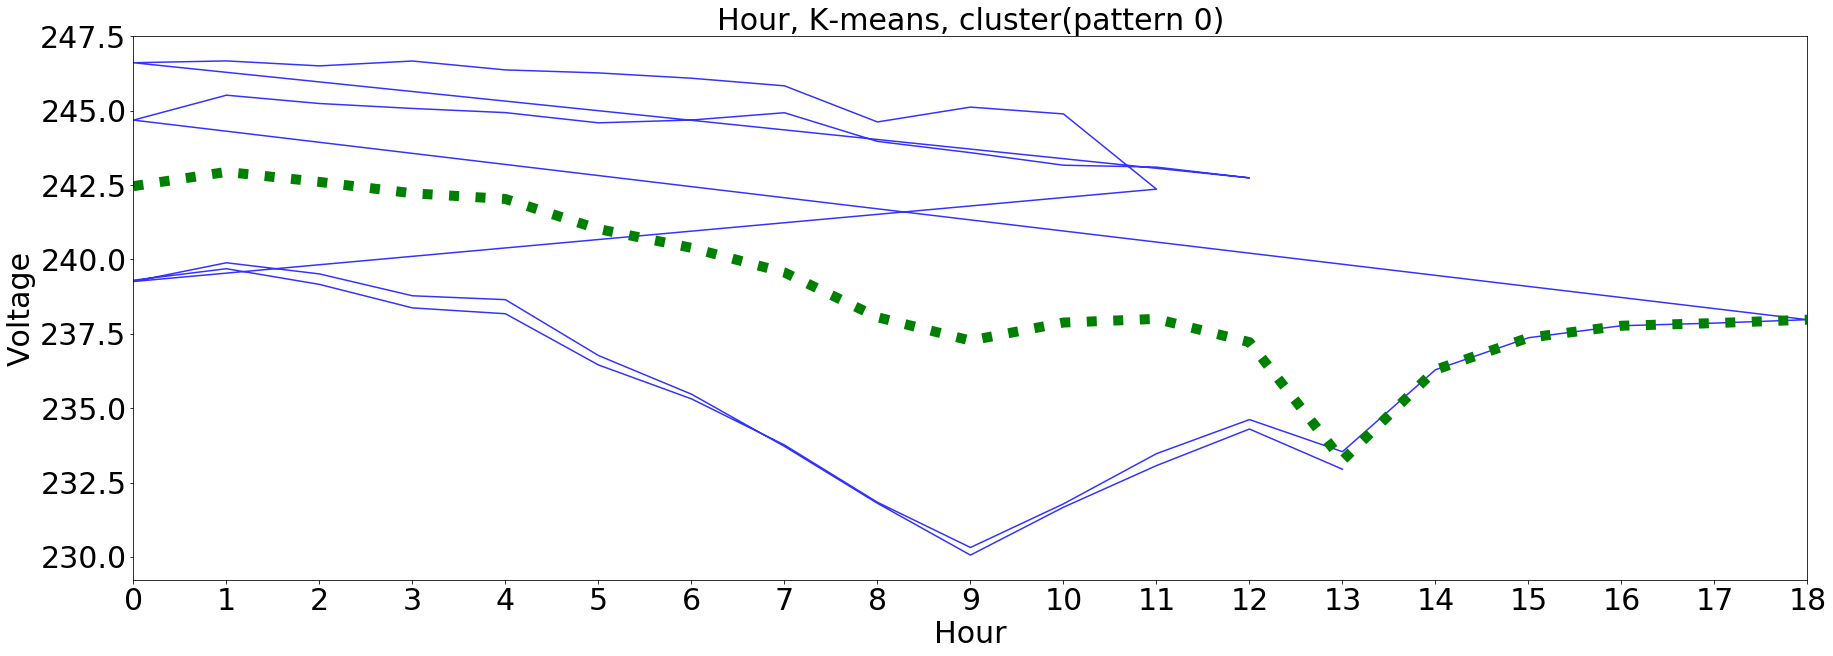

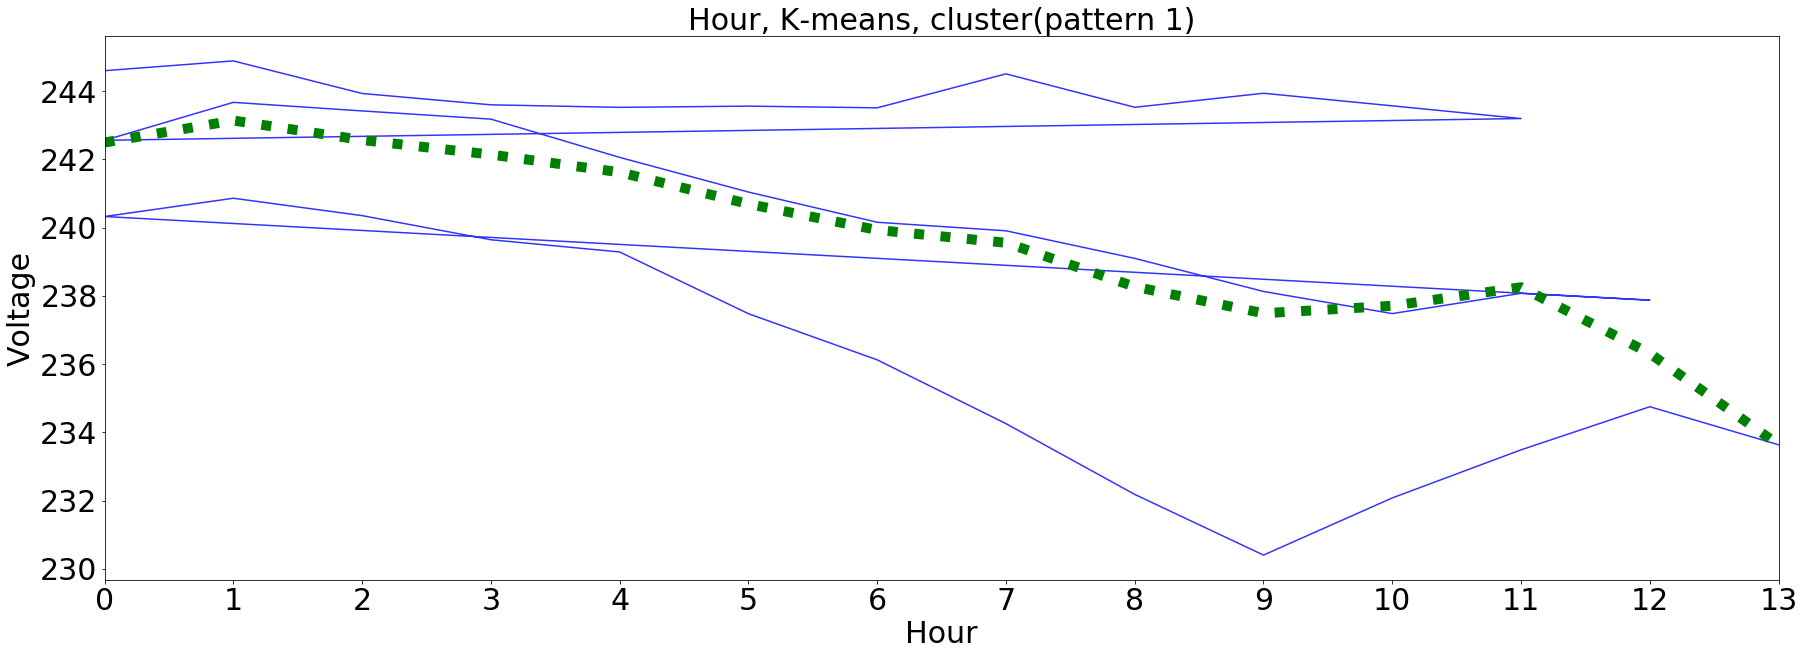

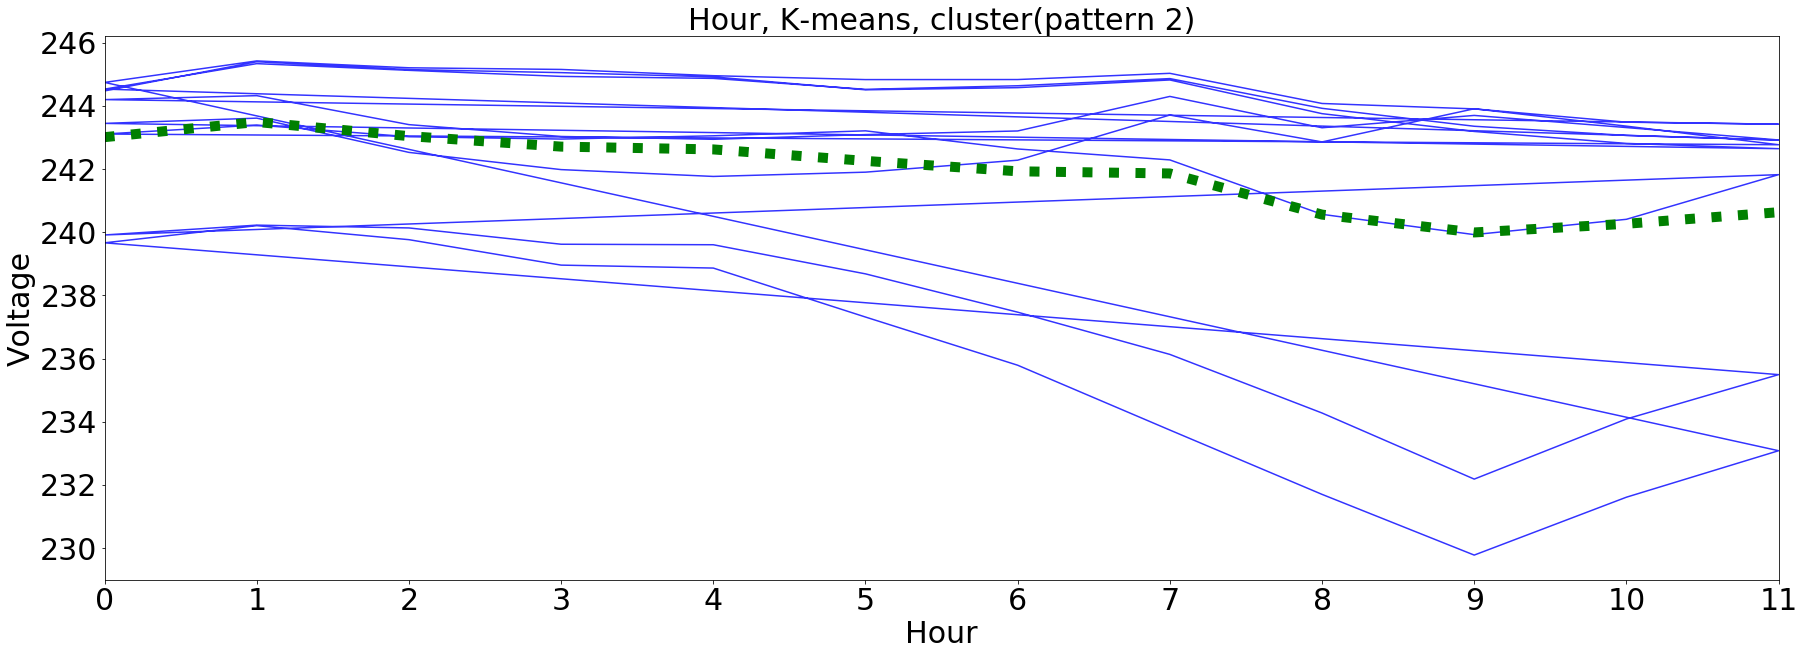

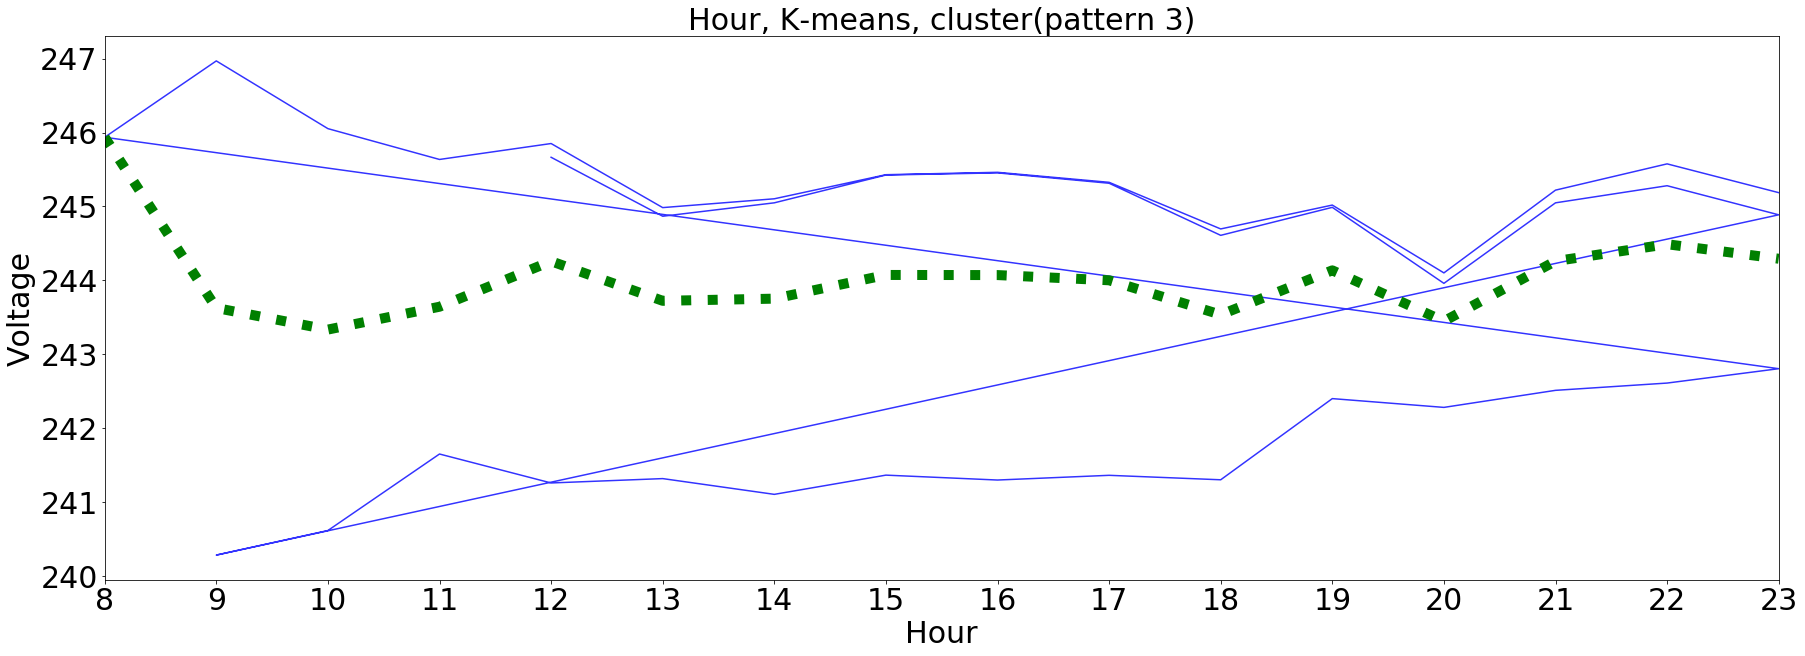

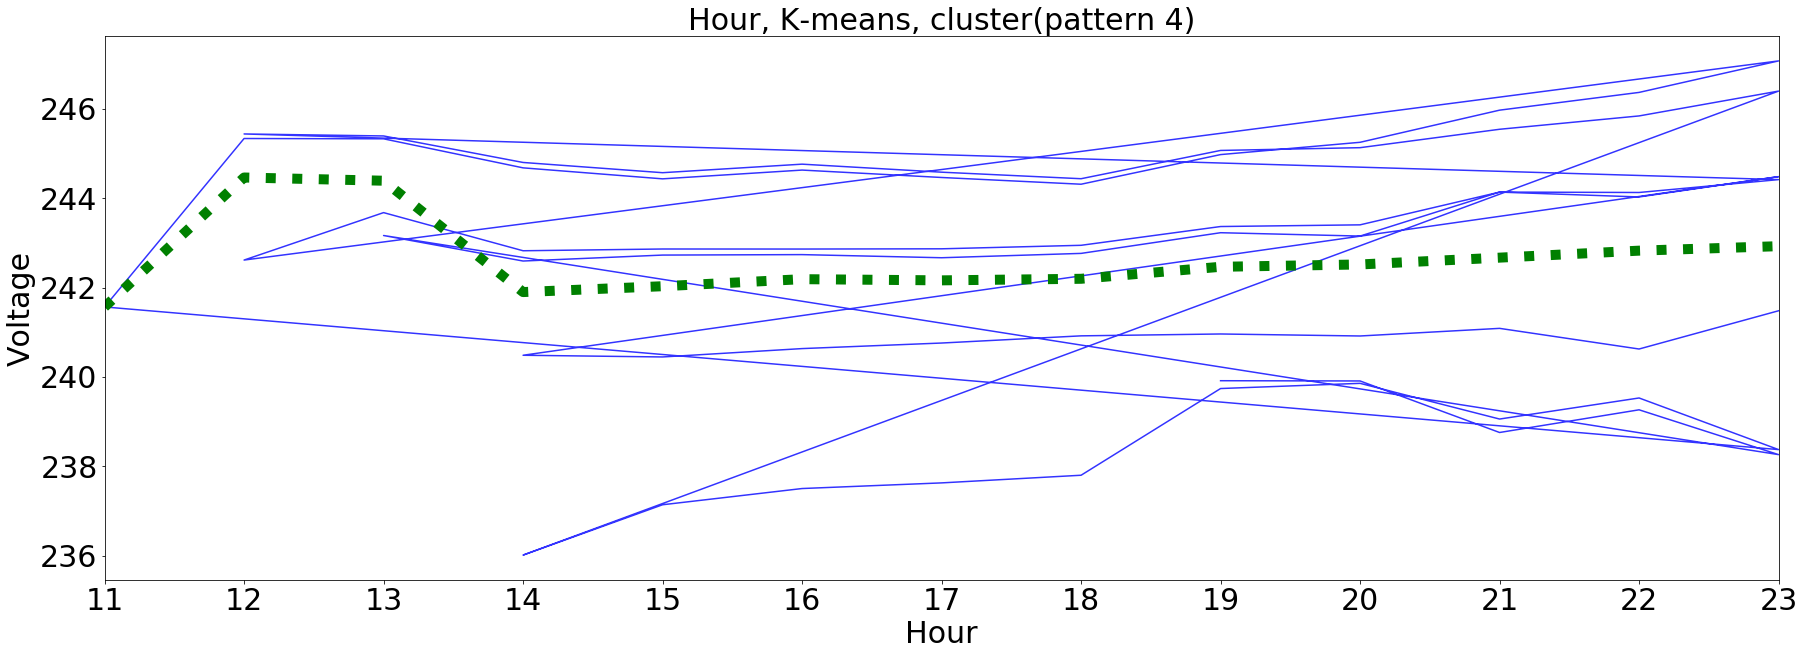

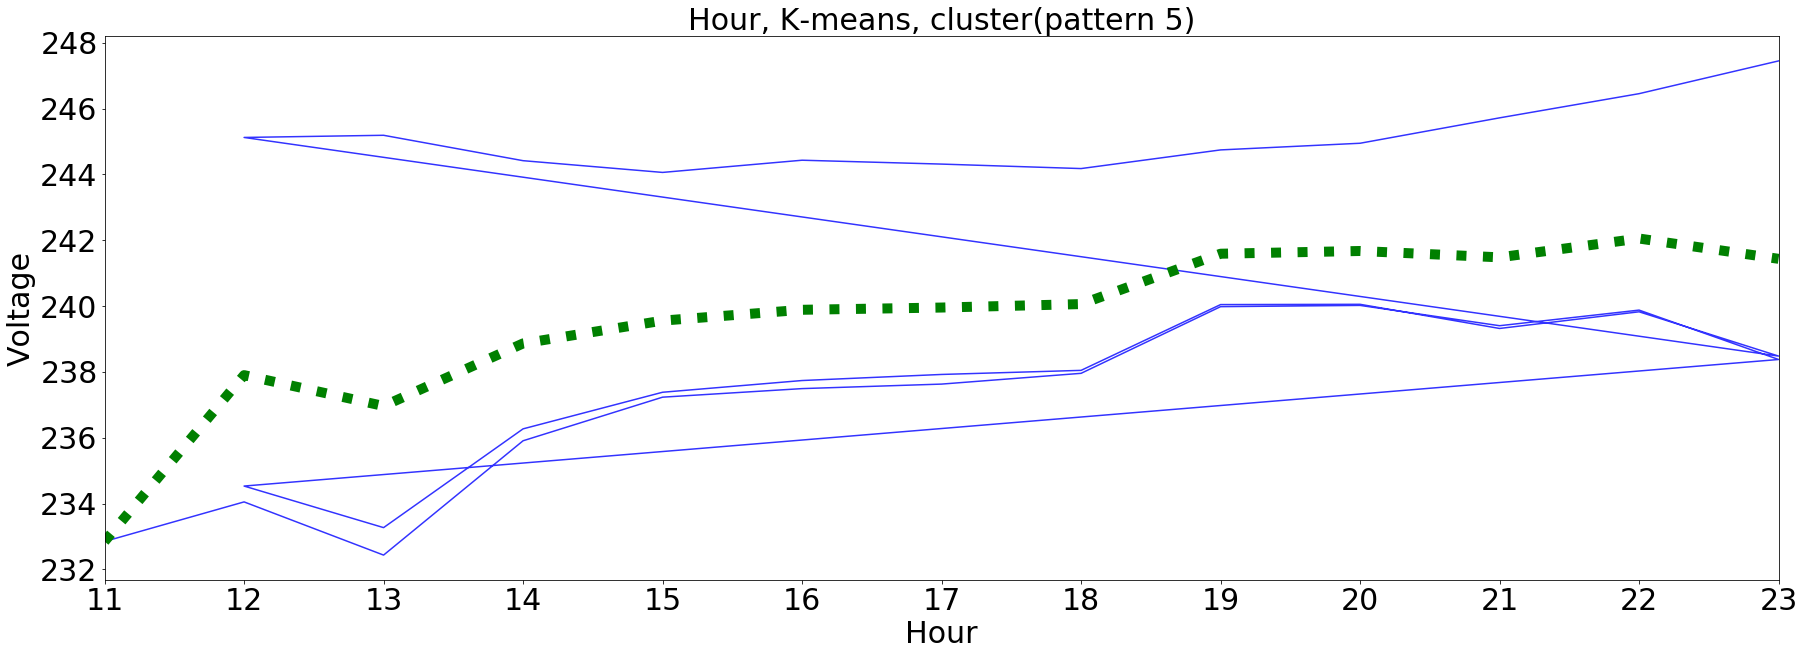

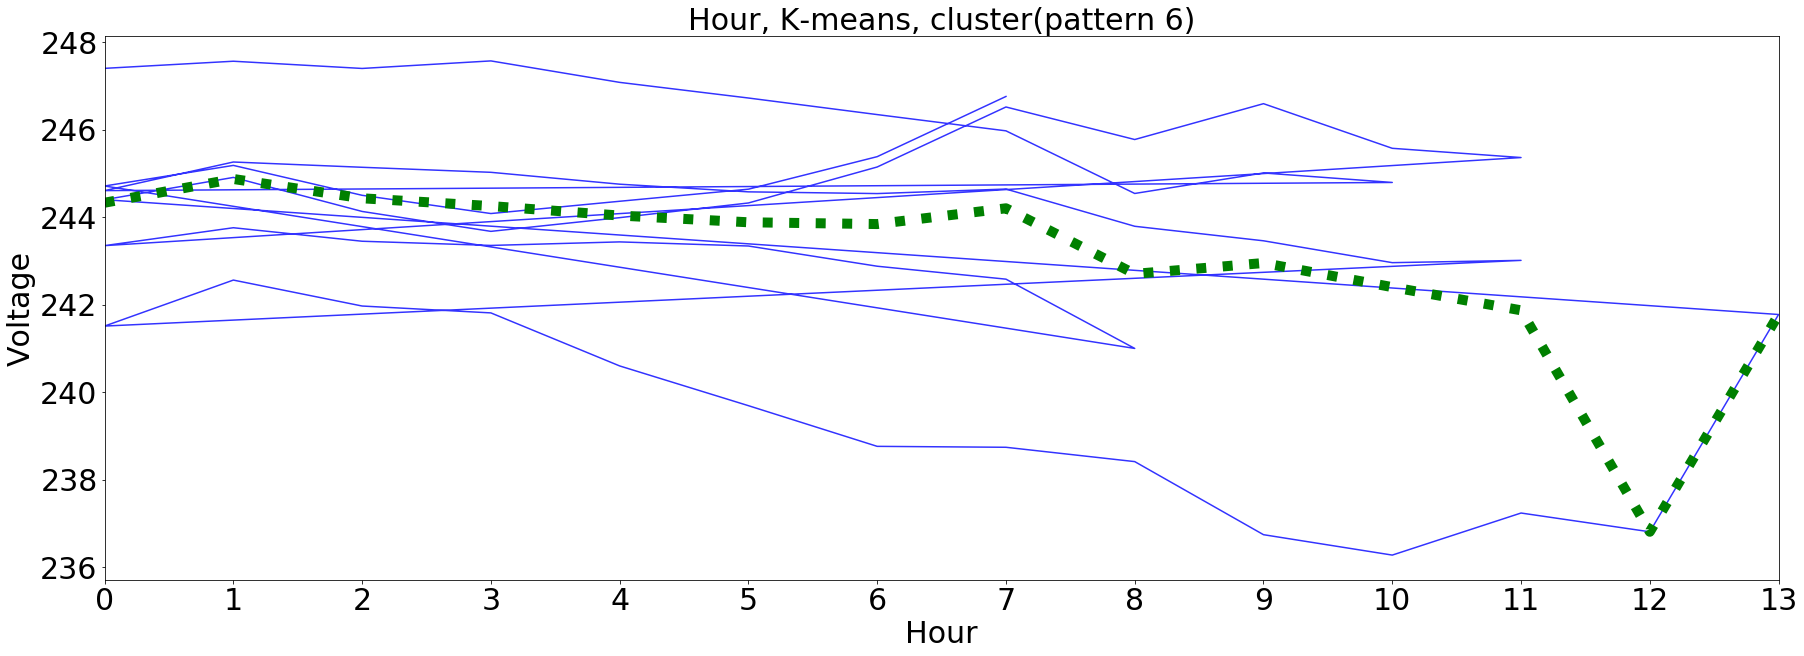

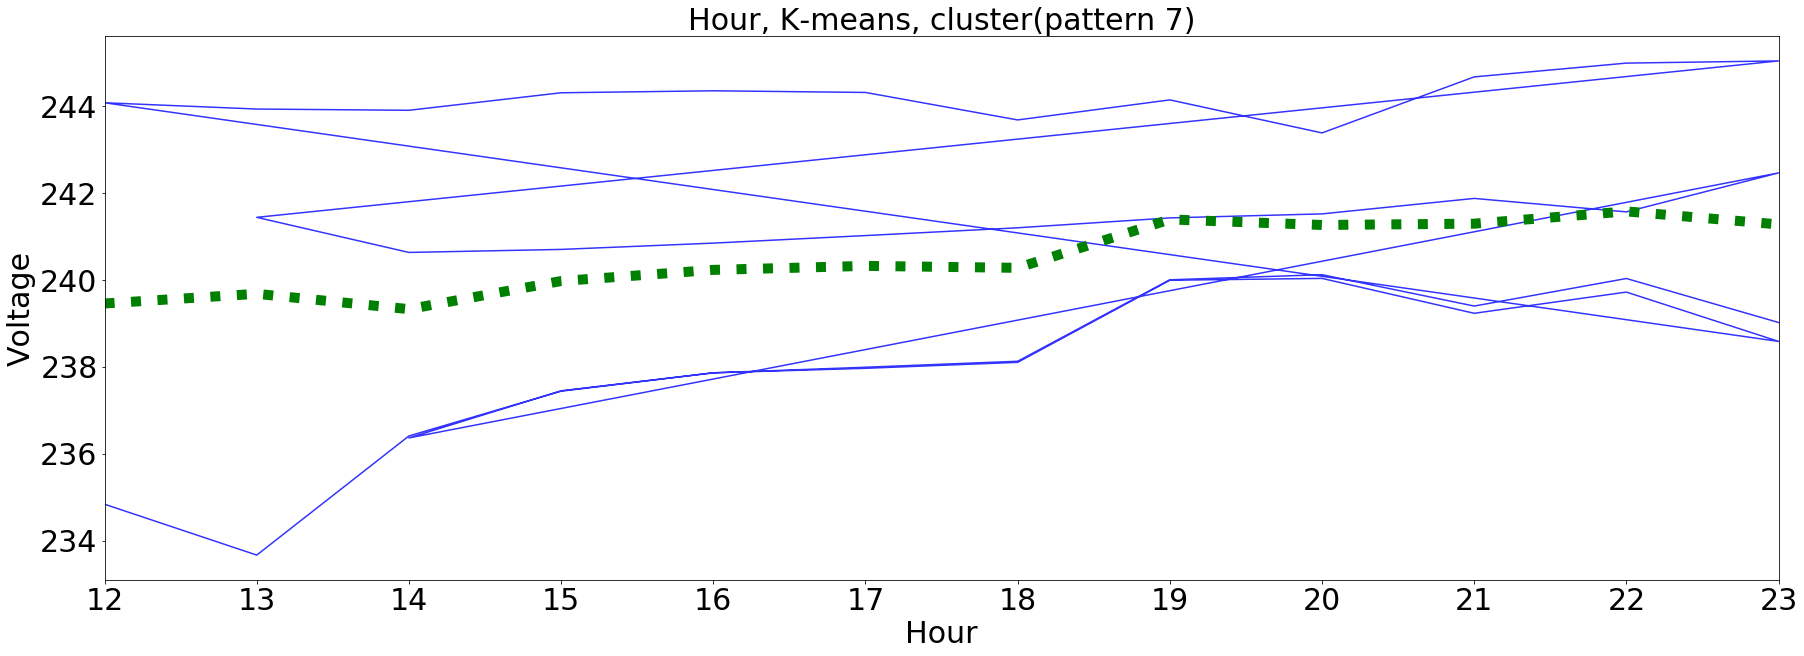

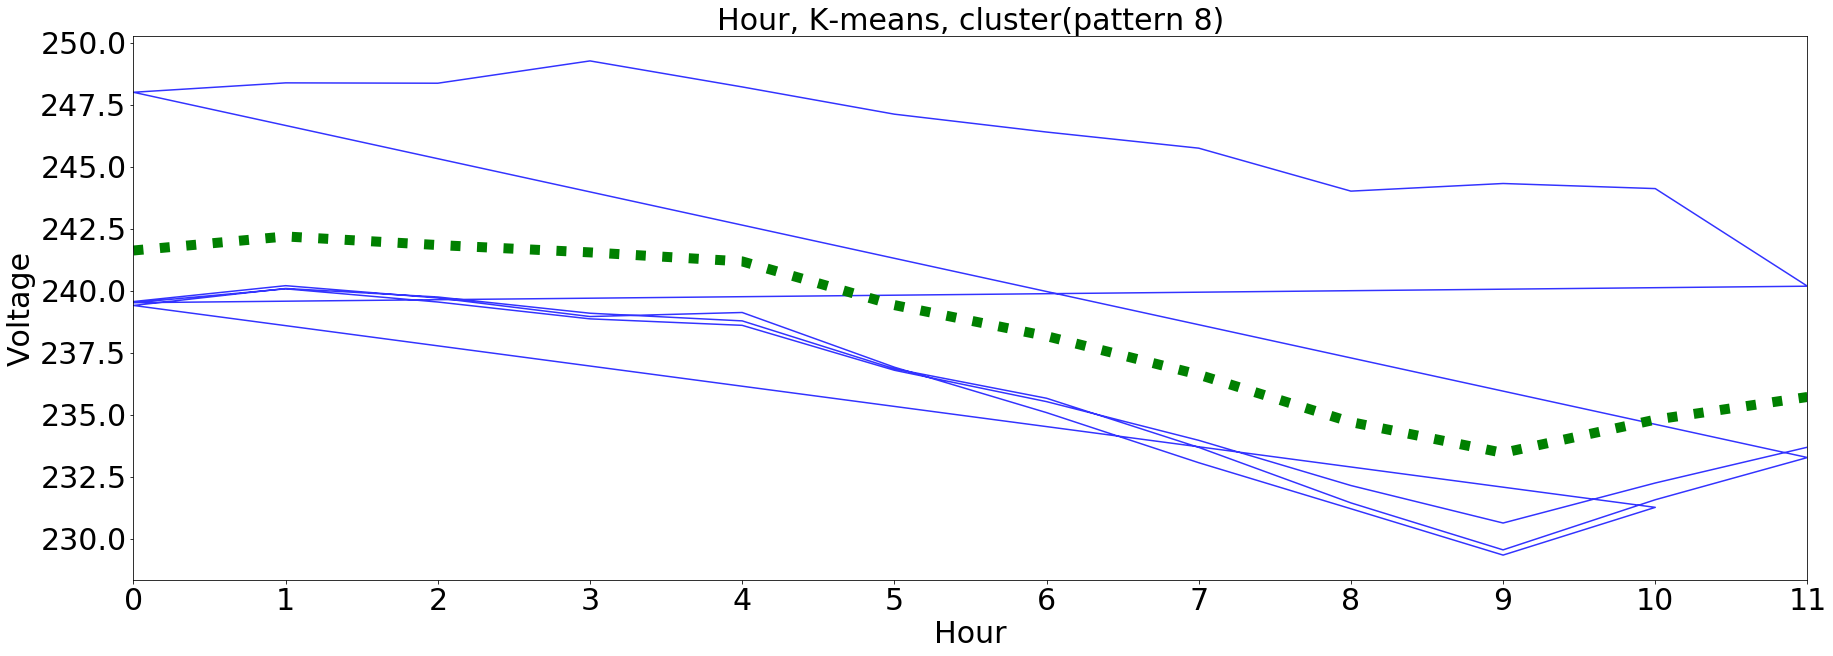

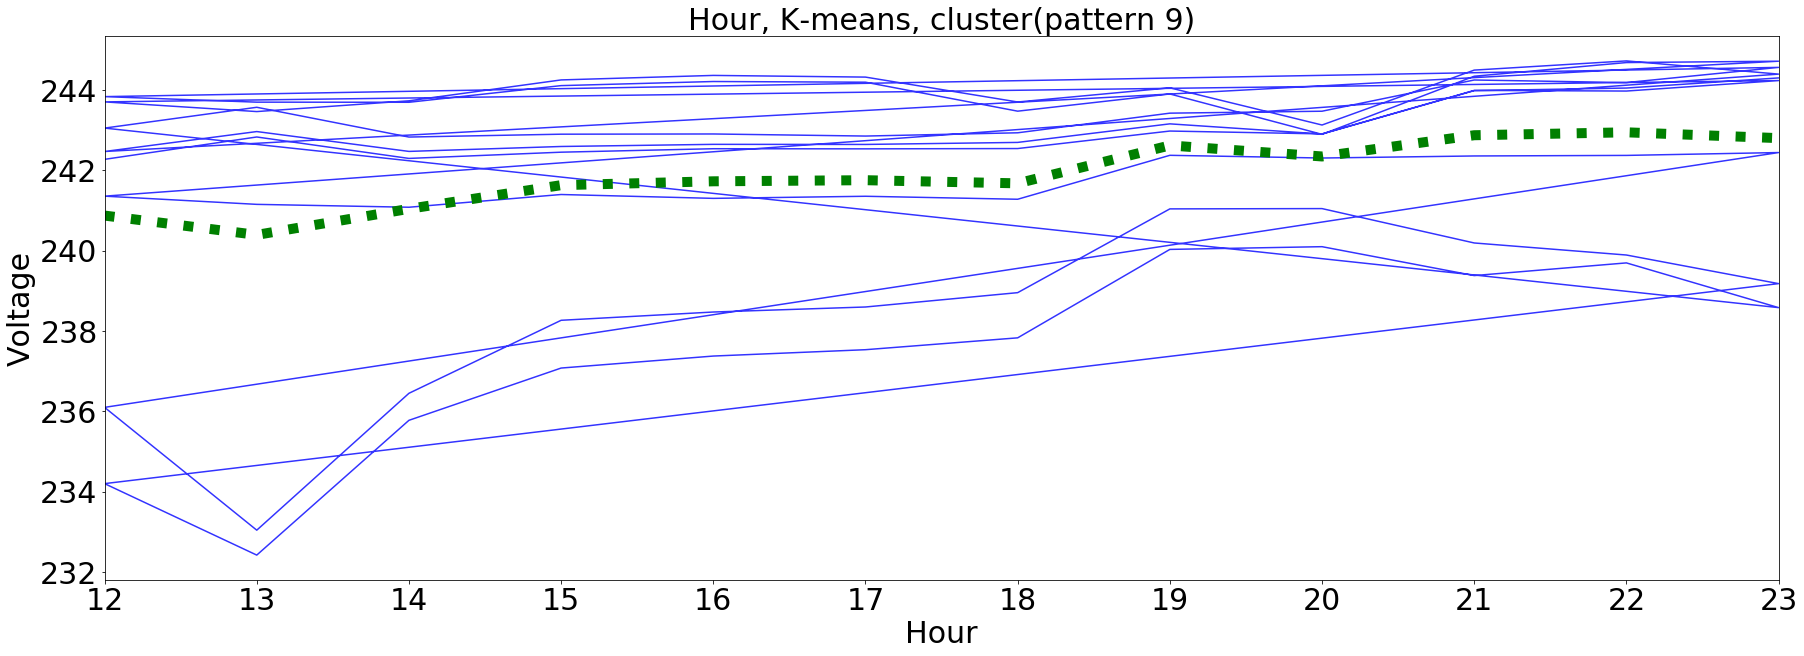

In [51]:
# color_list = ['red','green','blue']
# median_list = ['firebrick', 'darkgreen', 'darkblue']
cluster_num = 10

# fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(cluster_num):
    rows = group_hour[group_hour['cluster_kmeans'] == i]
    rows.plot('Hour', 'Voltage', kind = 'line', color= 'blue',alpha = 0.8, legend = False, figsize = (30, 10), grid = True, xticks = range(0,24), fontsize = 30)
    median = rows.groupby([ 'Hour'])['Voltage'].mean()
    median.plot(color = 'green', linewidth = 10, ls = ':')
    plt.title('Hour, K-means, cluster(pattern ' + str(i) + ")", fontsize = 30)
    plt.xlabel('Hour', fontsize = 30)
    plt.ylabel('Voltage', fontsize = 30)
    plt.show()

# train Date, mean shift

In [52]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [53]:
bandwidth = estimate_bandwidth(data_hour, quantile = 0.2, n_samples = 500)

meanShift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
predict = meanShift.fit_predict(data_train)

In [54]:
group_date['cluster_meanShift'] = predict

In [55]:
group_date['cluster_meanShift'].value_counts()

0    313
1    248
2    199
Name: cluster_meanShift, dtype: int64

### 可以看出， 只分了3类， 0， 1， 2对应类， 后面对应该类个数

In [56]:
group_date.head()

Id     Voltage   DateTime  cluster_kmeans  cluster_meanShift
0   4  243.687597 2019-01-11               5                  1
1   4  243.136206 2019-01-12               5                  1
2   4  243.043115 2019-01-13               5                  1
3   4  243.517026 2019-01-14               5                  1
4   4  243.216423 2019-01-15               5                  1

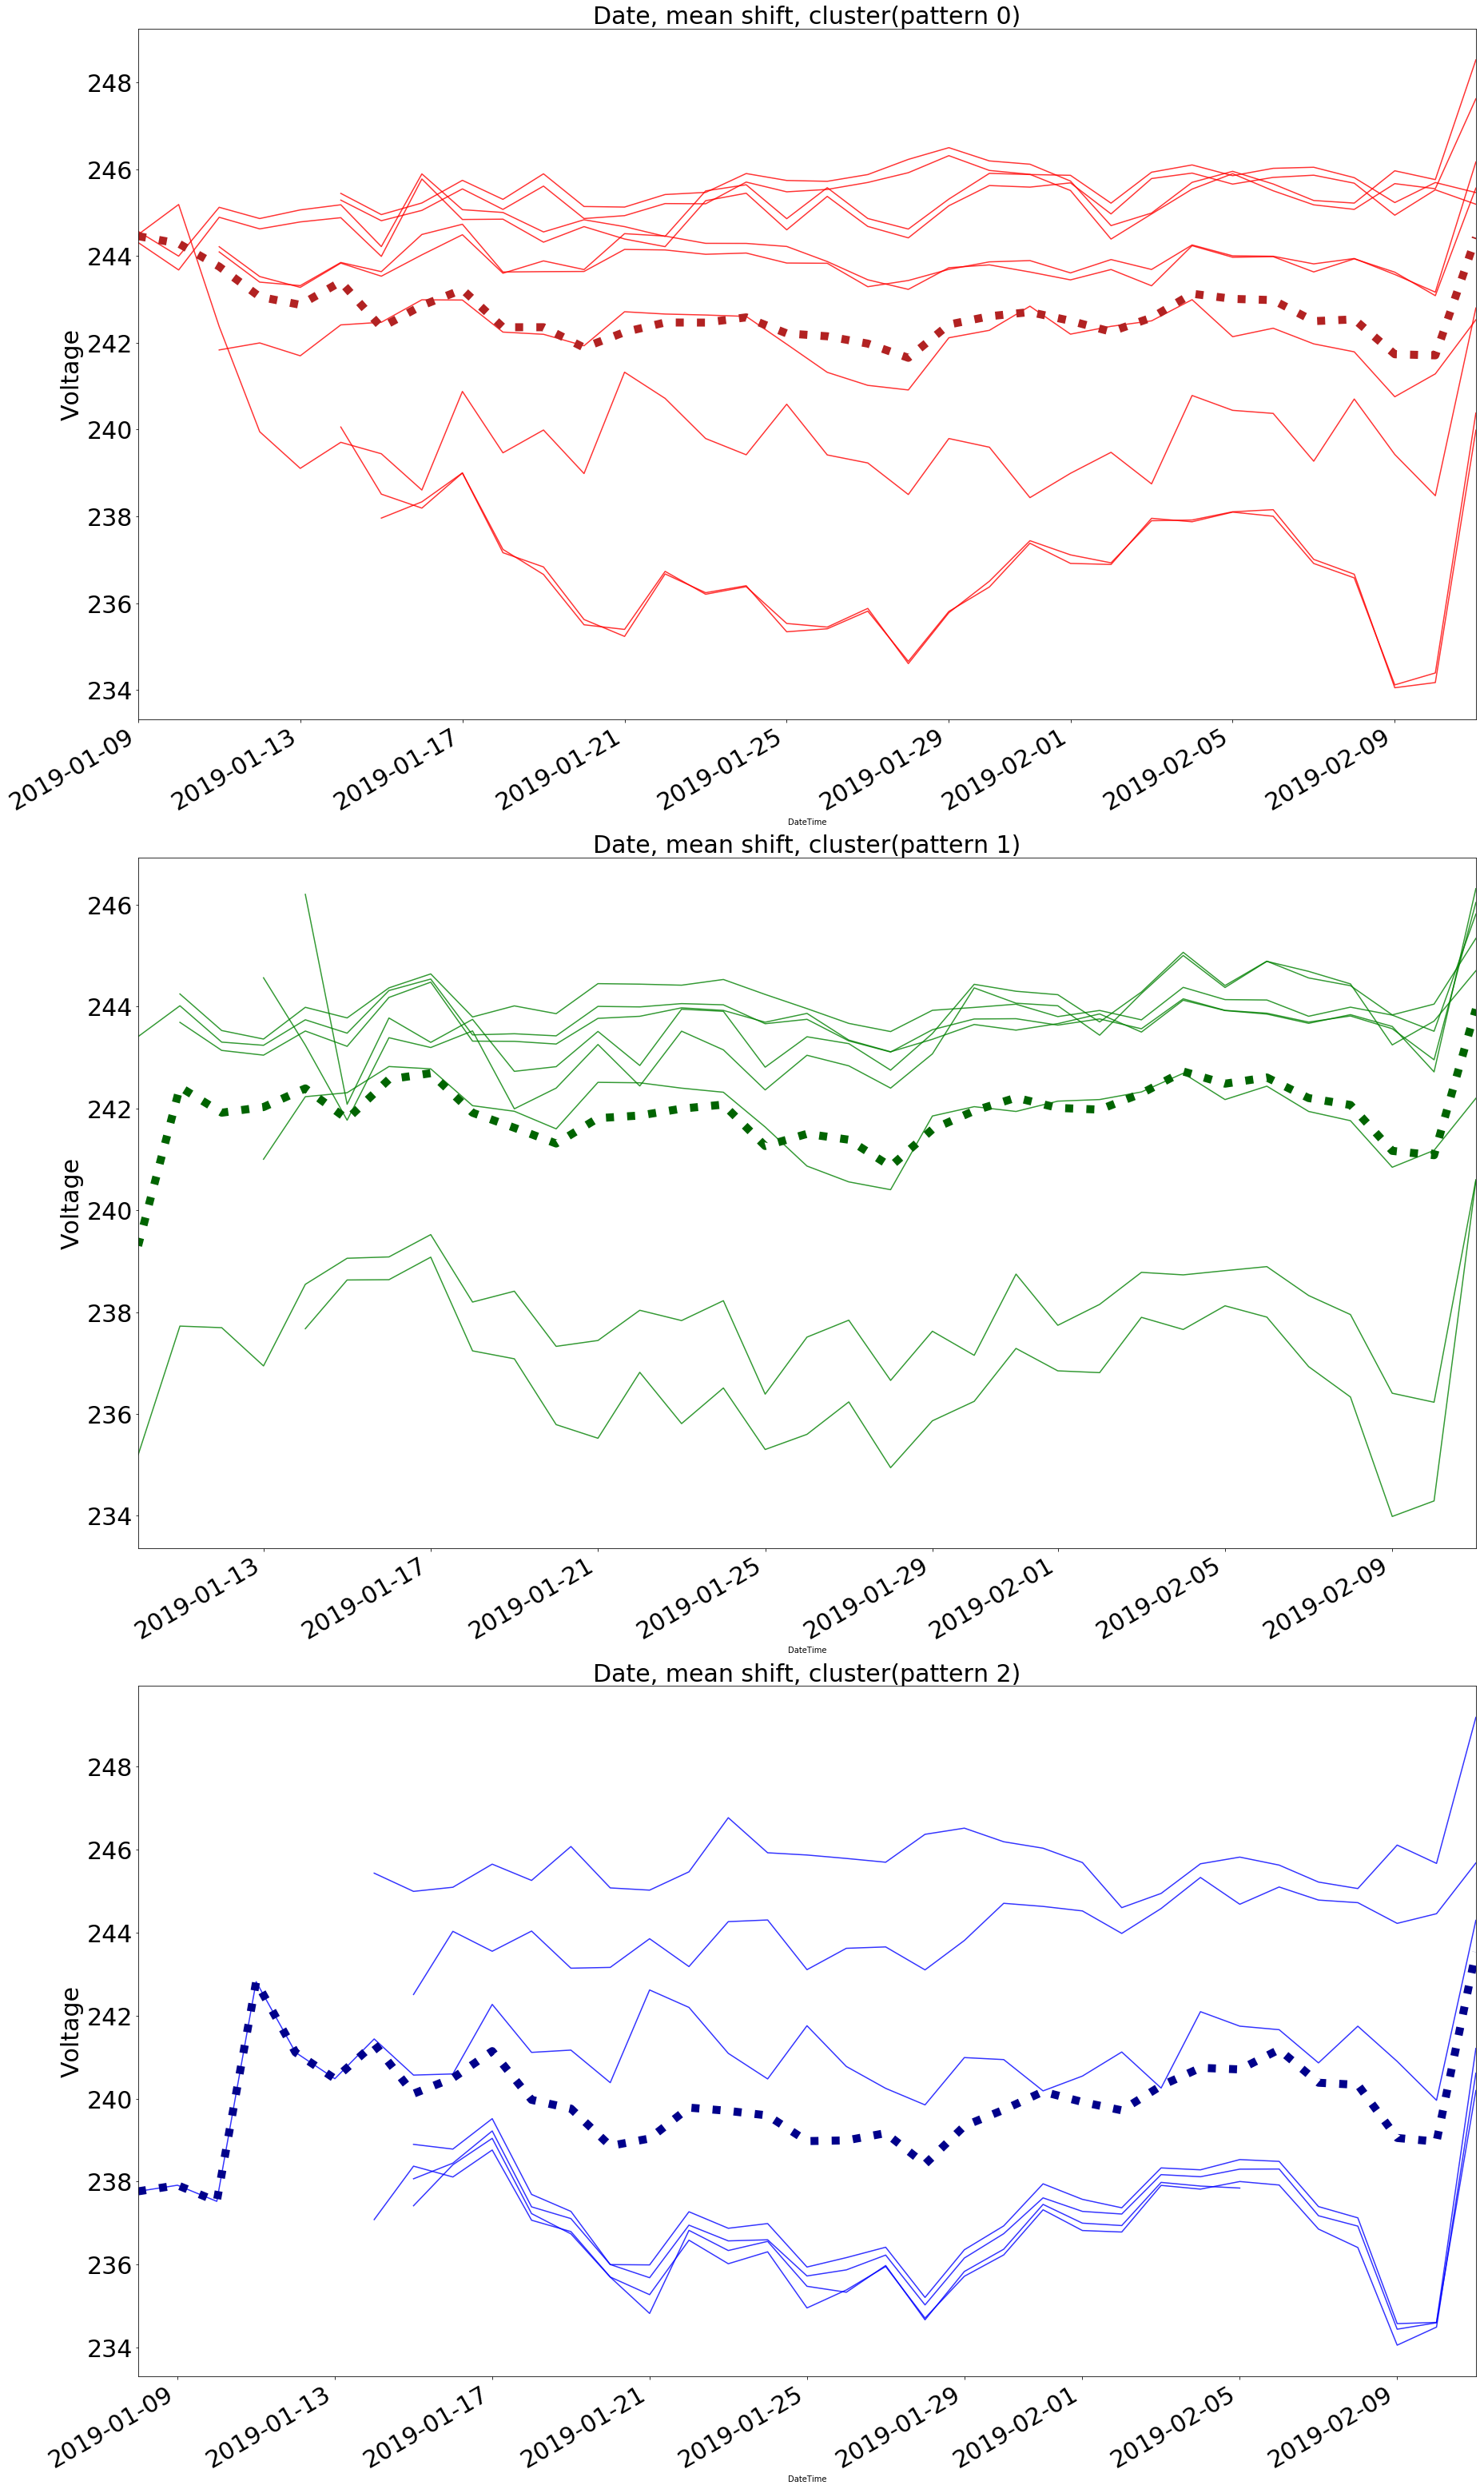

In [57]:
# id_list = group_date['Id'].drop_duplicates().tolist()
color_list = ['red','green','blue']
median_list = ['firebrick', 'darkgreen', 'darkblue']
fig, axes = plt.subplots(3, 1, figsize = (30, 60))
# fig.tight_layout()
# plt.subplots_adjust(wspace =0, hspace =0)

for i in range(len(id_list)):
    rows = group_date[group_date['Id'] == id_list[i]]
    cluster_index = int(rows['cluster_meanShift'].mode())  
    rows.plot('DateTime', 'Voltage', kind = 'line',ax = axes[cluster_index], color= color_list[cluster_index], alpha = 0.8,legend = False, grid = True, fontsize = 30)
    axes[cluster_index].set_title('Date, mean shift, cluster(pattern ' + str(cluster_index) + ")", fontsize = 30)
#     axes[cluster_index].set_xlabel('date', fontsize = 30)
    axes[cluster_index].set_ylabel('Voltage', fontsize = 30)
#     plt.show()
    
# plot median for 3 clusters
cluster_num = 3
for i in range(cluster_num):
    rows = group_date[group_date['cluster_meanShift'] == i]
    median = rows.groupby([ 'DateTime'])['Voltage'].mean()
    median.plot(color = median_list[i],ax = axes[i], linewidth = 10, ls = ':')


# train Hour, mean shift

In [58]:
bandwidth = estimate_bandwidth(data_hour, quantile = 0.2, n_samples = 500)

meanShift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
predict = meanShift.fit_predict(data_hour)


In [59]:
group_hour['cluster_meanShift'] = predict

In [60]:
group_hour.head()

Id  Hour     Voltage  cluster_kmeans  cluster_meanShift
0   4     0  244.472581               2                  1
1   4     1  245.396561               2                  1
2   4     2  245.148088               2                  1
3   4     3  245.051419               2                  1
4   4     4  244.917742               2                  1

In [61]:
group_hour['cluster_meanShift'].value_counts()

0    264
1    192
2    144
Name: cluster_meanShift, dtype: int64

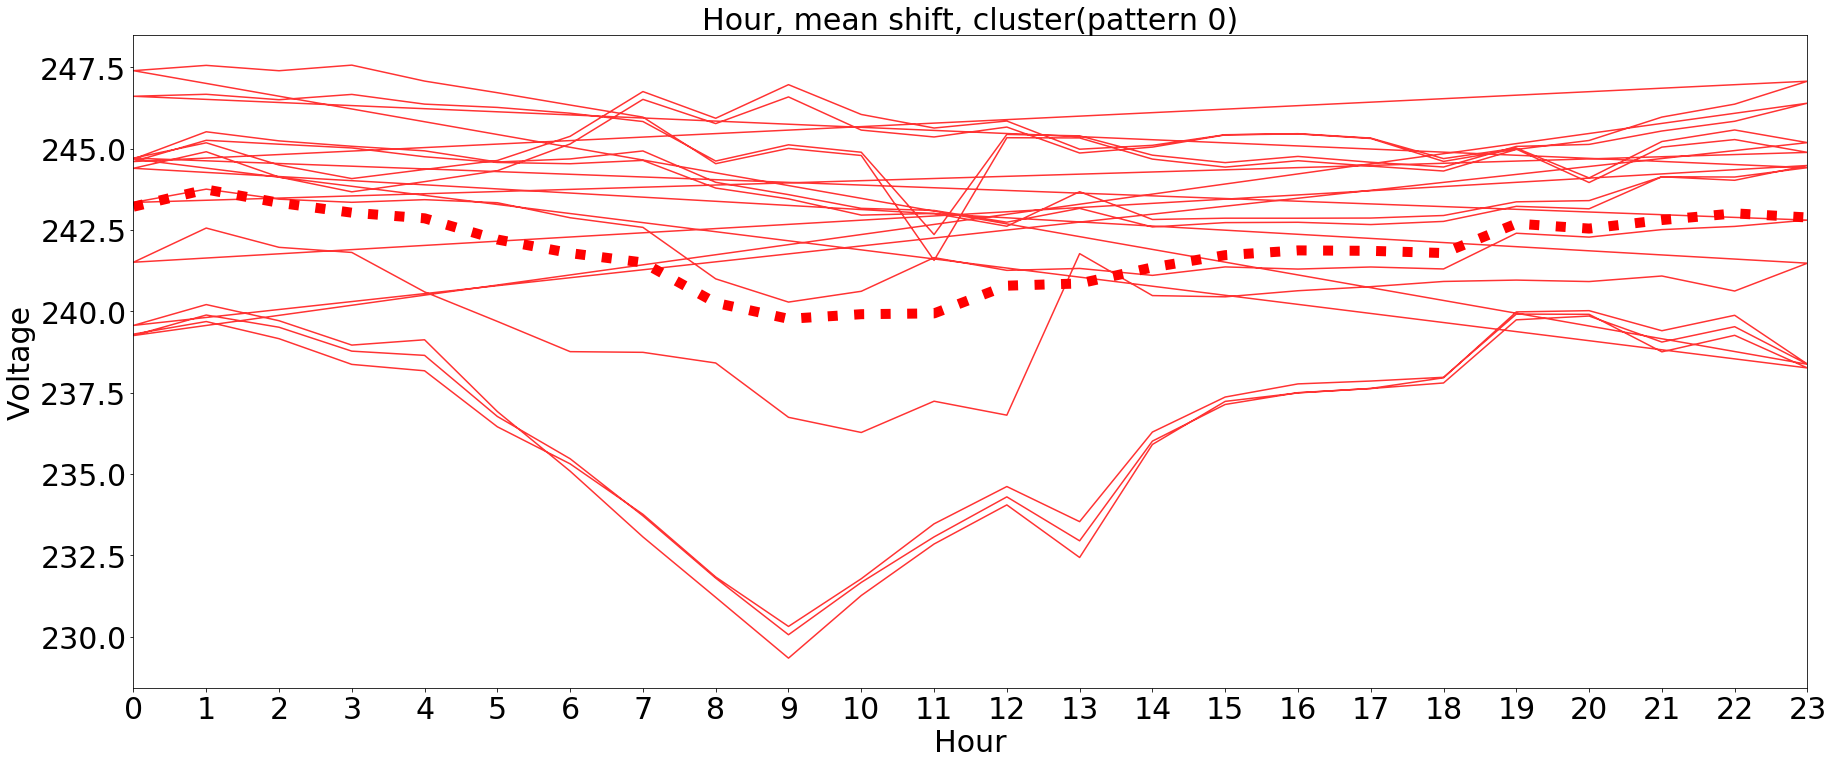

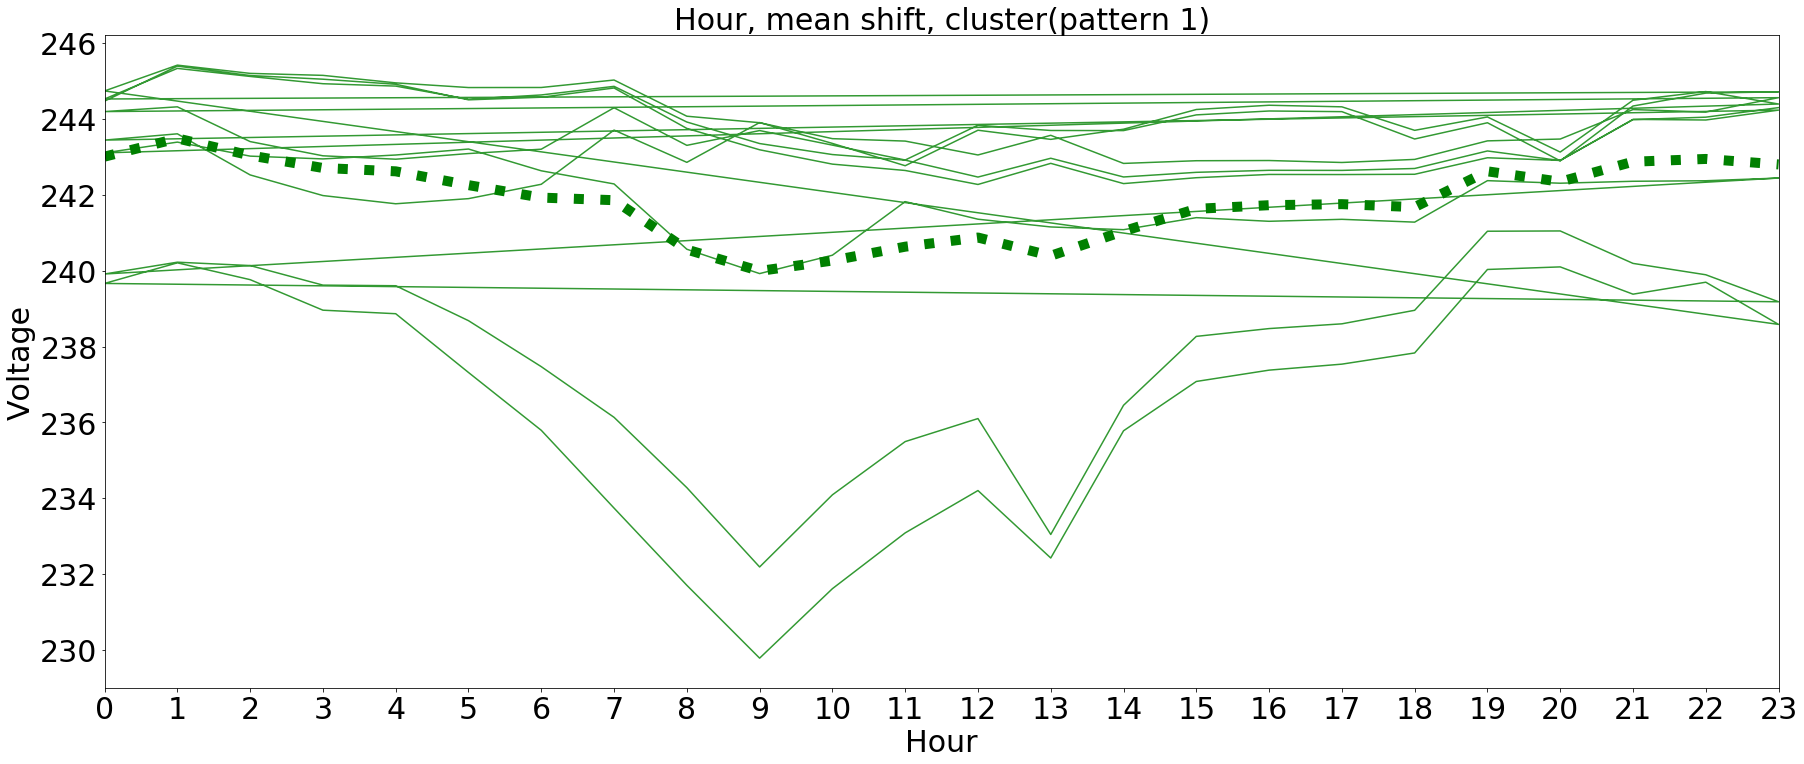

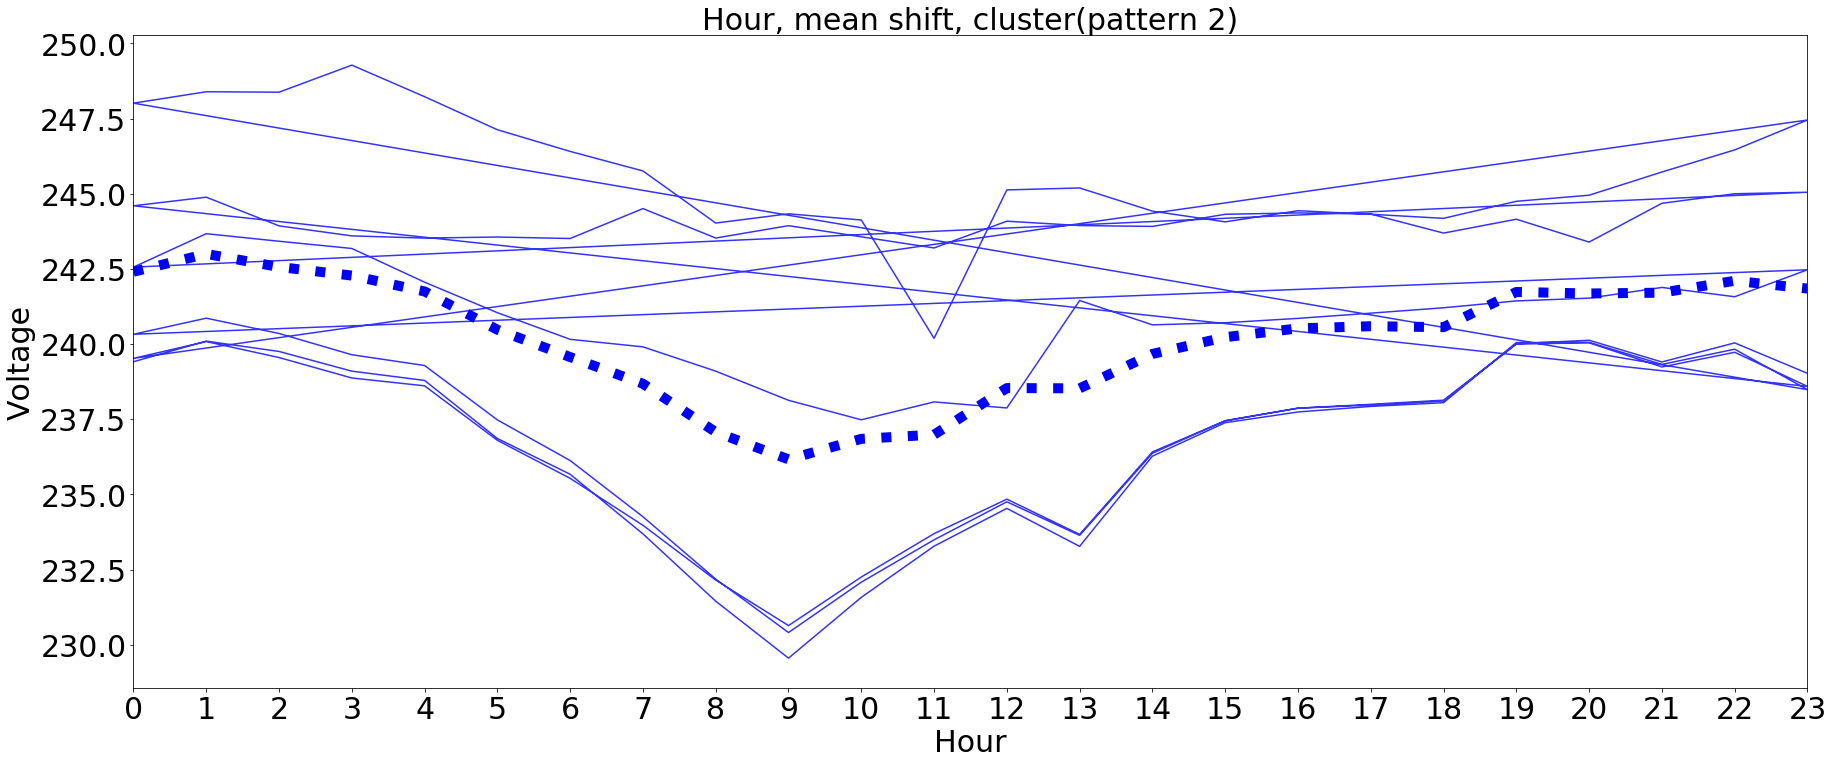

In [62]:
color_list = ['red','green','blue']
median_list = ['firebrick', 'darkgreen', 'darkblue']
cluster_num = 3

# fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(cluster_num):
    rows = group_hour[group_hour['cluster_meanShift'] == i]
    rows.plot('Hour', 'Voltage', kind = 'line', color= color_list[i],alpha = 0.8, legend = False, figsize = (30, 12), grid = True, xticks = range(0,24), fontsize = 30)
    median = rows.groupby([ 'Hour'])['Voltage'].mean()
    median.plot(color = color_list[i], linewidth = 10, ls = ':')
    plt.title('Hour, mean shift, cluster(pattern ' + str(i) + ")", fontsize = 30)
    plt.xlabel('Hour', fontsize = 30)
    plt.ylabel('Voltage', fontsize = 30)
    plt.show()
    

# train Date, DBSCAN

In [63]:
from sklearn.cluster import DBSCAN

In [64]:
predict = DBSCAN(eps = 0.01, min_samples = 100).fit_predict(data_train)

In [65]:
group_date['cluster_DBSCAN'] = predict

In [66]:
group_date['cluster_DBSCAN'].value_counts()

-1    760
Name: cluster_DBSCAN, dtype: int64

### 可以看出， 只分了一类， 760个data都是-1

In [67]:
group_date.head()

Id     Voltage   DateTime  cluster_kmeans  cluster_meanShift  \
0   4  243.687597 2019-01-11               5                  1   
1   4  243.136206 2019-01-12               5                  1   
2   4  243.043115 2019-01-13               5                  1   
3   4  243.517026 2019-01-14               5                  1   
4   4  243.216423 2019-01-15               5                  1   

   cluster_DBSCAN  
0              -1  
1              -1  
2              -1  
3              -1  
4              -1

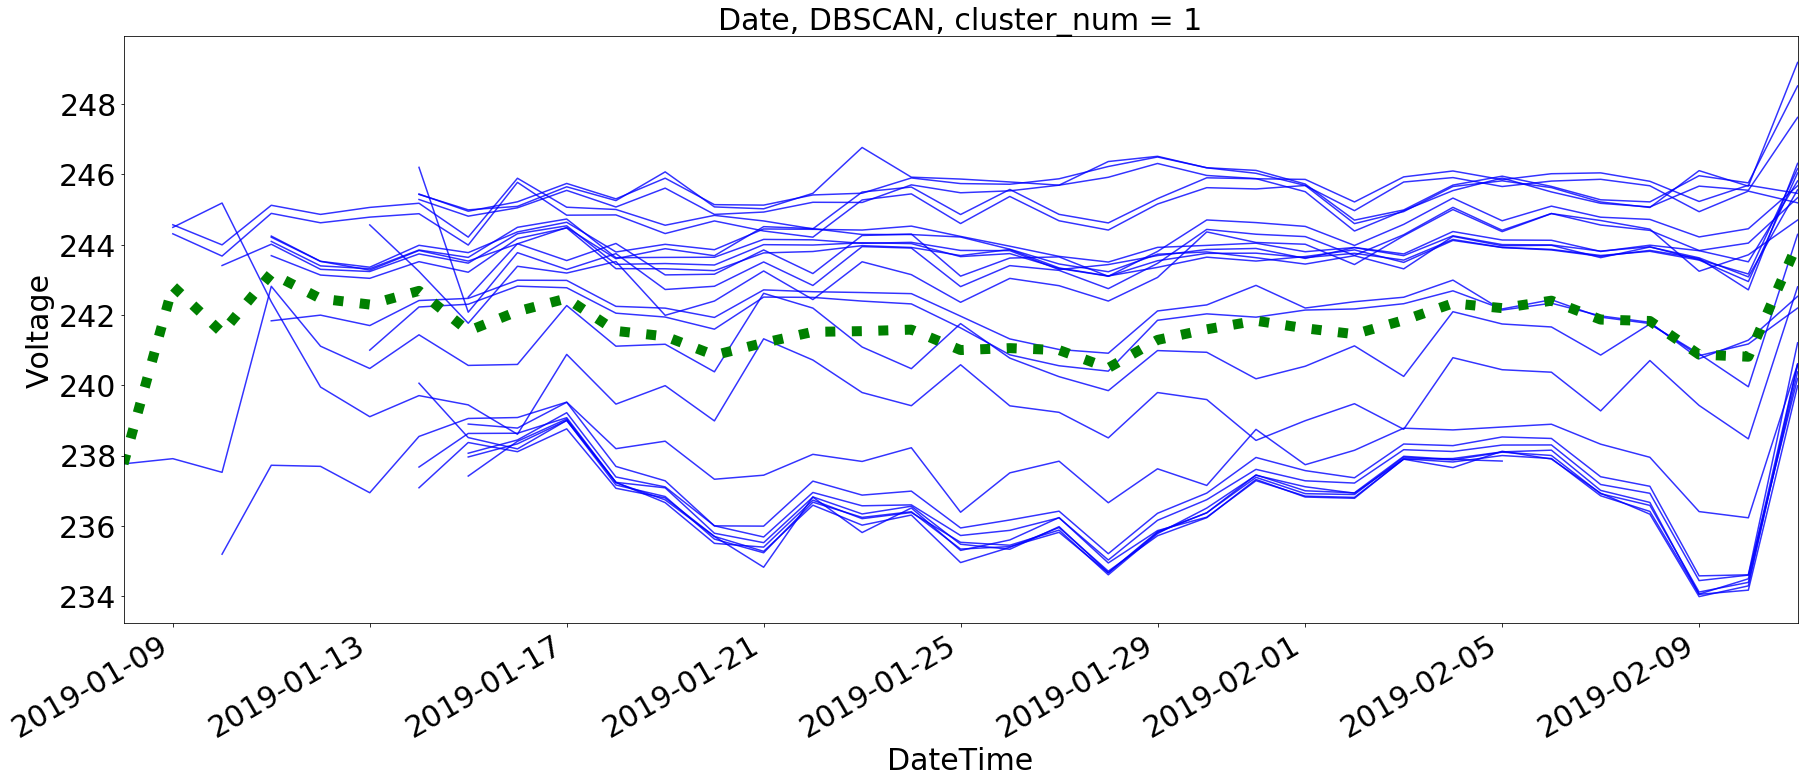

In [68]:
# id_list = group_date['Id'].drop_duplicates().tolist()
# color_list = ['red','green','blue']
# median_list = ['firebrick', 'darkgreen', 'darkblue']
fig, axes = plt.subplots(1, 1, figsize = (30, 12))
# fig.tight_layout()
# plt.subplots_adjust(wspace =0, hspace =0)

for i in range(len(id_list)):
    rows = group_date[group_date['Id'] == id_list[i]]
    cluster_index = int(rows['cluster_DBSCAN'].mode())  
    rows.plot('DateTime', 'Voltage', kind = 'line', color= 'blue', ax = axes, alpha = 0.8,legend = False, grid = True, fontsize = 30)
    
# plot median for 1 clusters
cluster_num = 1
for i in range(cluster_num):
    rows = group_date[group_date['cluster_DBSCAN'] == -1]
    median = rows.groupby([ 'DateTime'])['Voltage'].mean()
    median.plot(color = 'green',ax = axes, linewidth = 10, ls = ':')

plt.title('Date, DBSCAN, cluster_num = 1', fontsize = 30)
plt.xlabel('DateTime', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()

# train Hour, DBSCAN

In [69]:
predict = DBSCAN(eps = 0.0000001, min_samples = 100).fit_predict(data_hour)

In [70]:
group_hour['cluster_DBSCAN'] = predict

In [71]:
group_hour['cluster_DBSCAN'].value_counts()

-1    600
Name: cluster_DBSCAN, dtype: int64

In [72]:
group_hour.head()

Id  Hour     Voltage  cluster_kmeans  cluster_meanShift  cluster_DBSCAN
0   4     0  244.472581               2                  1              -1
1   4     1  245.396561               2                  1              -1
2   4     2  245.148088               2                  1              -1
3   4     3  245.051419               2                  1              -1
4   4     4  244.917742               2                  1              -1

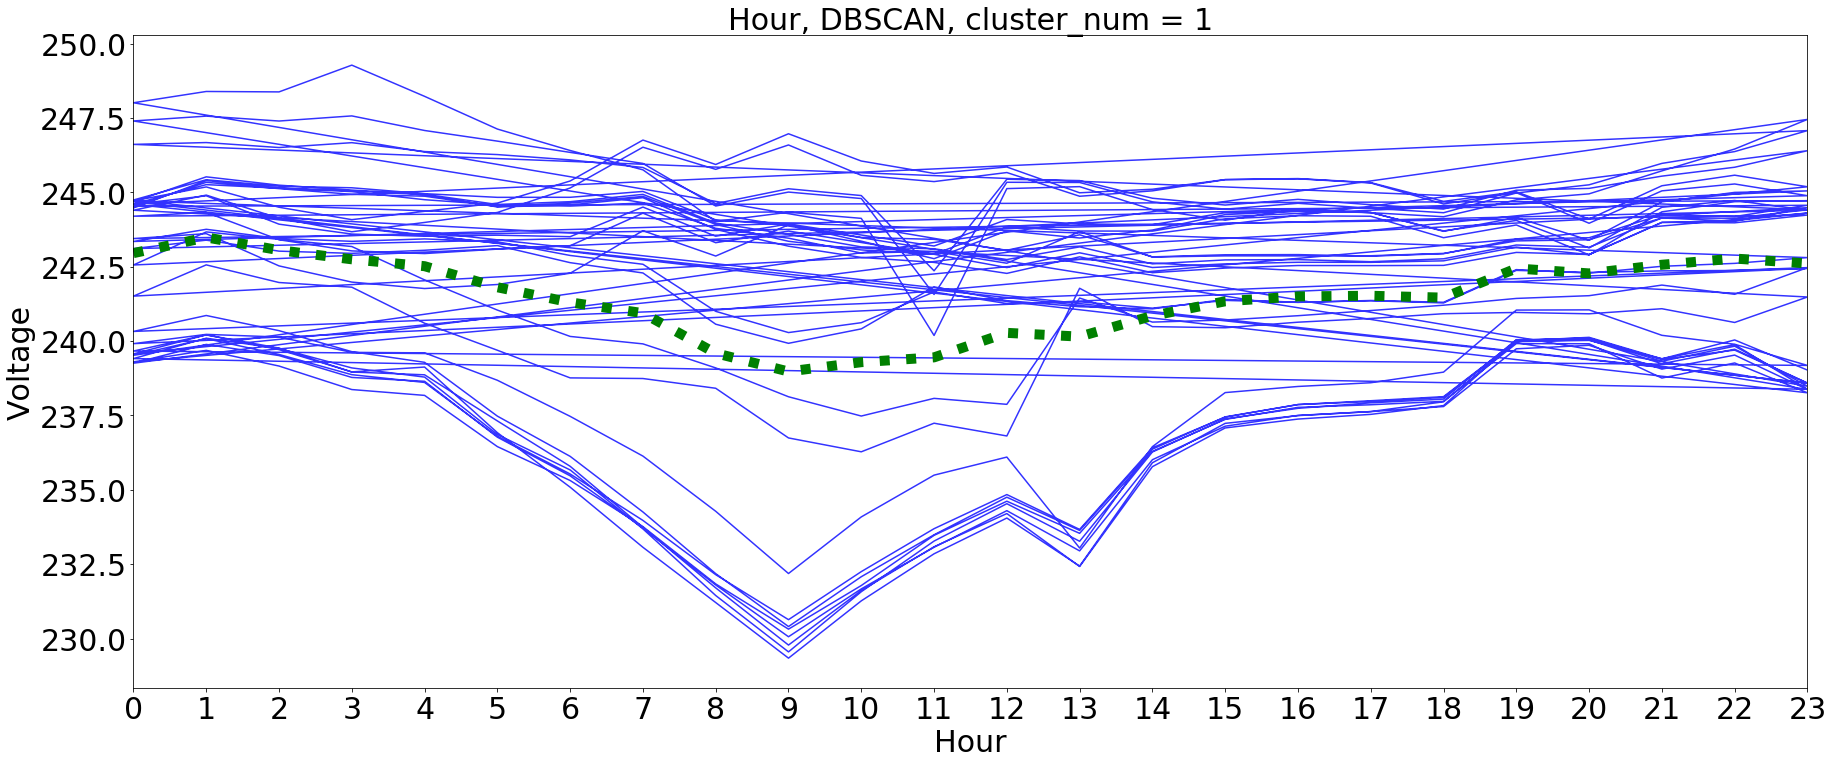

In [73]:
# color_list = ['red','green','blue']
# median_list = ['firebrick', 'darkgreen', 'darkblue']
cluster_num = 1

# fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(cluster_num):
    rows = group_hour[group_hour['cluster_DBSCAN'] == -1]
    rows.plot('Hour', 'Voltage', kind = 'line', color= 'blue',alpha = 0.8, legend = False, figsize = (30, 12), grid = True, xticks = range(0,24), fontsize = 30)
    median = rows.groupby([ 'Hour'])['Voltage'].mean()
    median.plot(color = 'green', linewidth = 10, ls = ':')
    plt.title('Hour, DBSCAN, cluster_num = 1', fontsize = 30)
    plt.xlabel('Hour', fontsize = 30)
    plt.ylabel('Voltage', fontsize = 30)
    plt.show()
    